In [45]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=120853 sha256=2d5fc69c0a3a54d8d06f8d7ca7290fb514493d0275f656b7b68328f2398bfb1f
  Stored in directory: /tmp/pip-ephem-wheel-cache-likuo2md/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  6
Nb of segmented links :  16.0
Nb of event times :  26


In [2]:
S.links

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4)]

In [3]:
S.link_presence[2]

[3.0, 5.0, 11.0, 11.0, 19.0, 22.0, 25.0, 28.0]

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


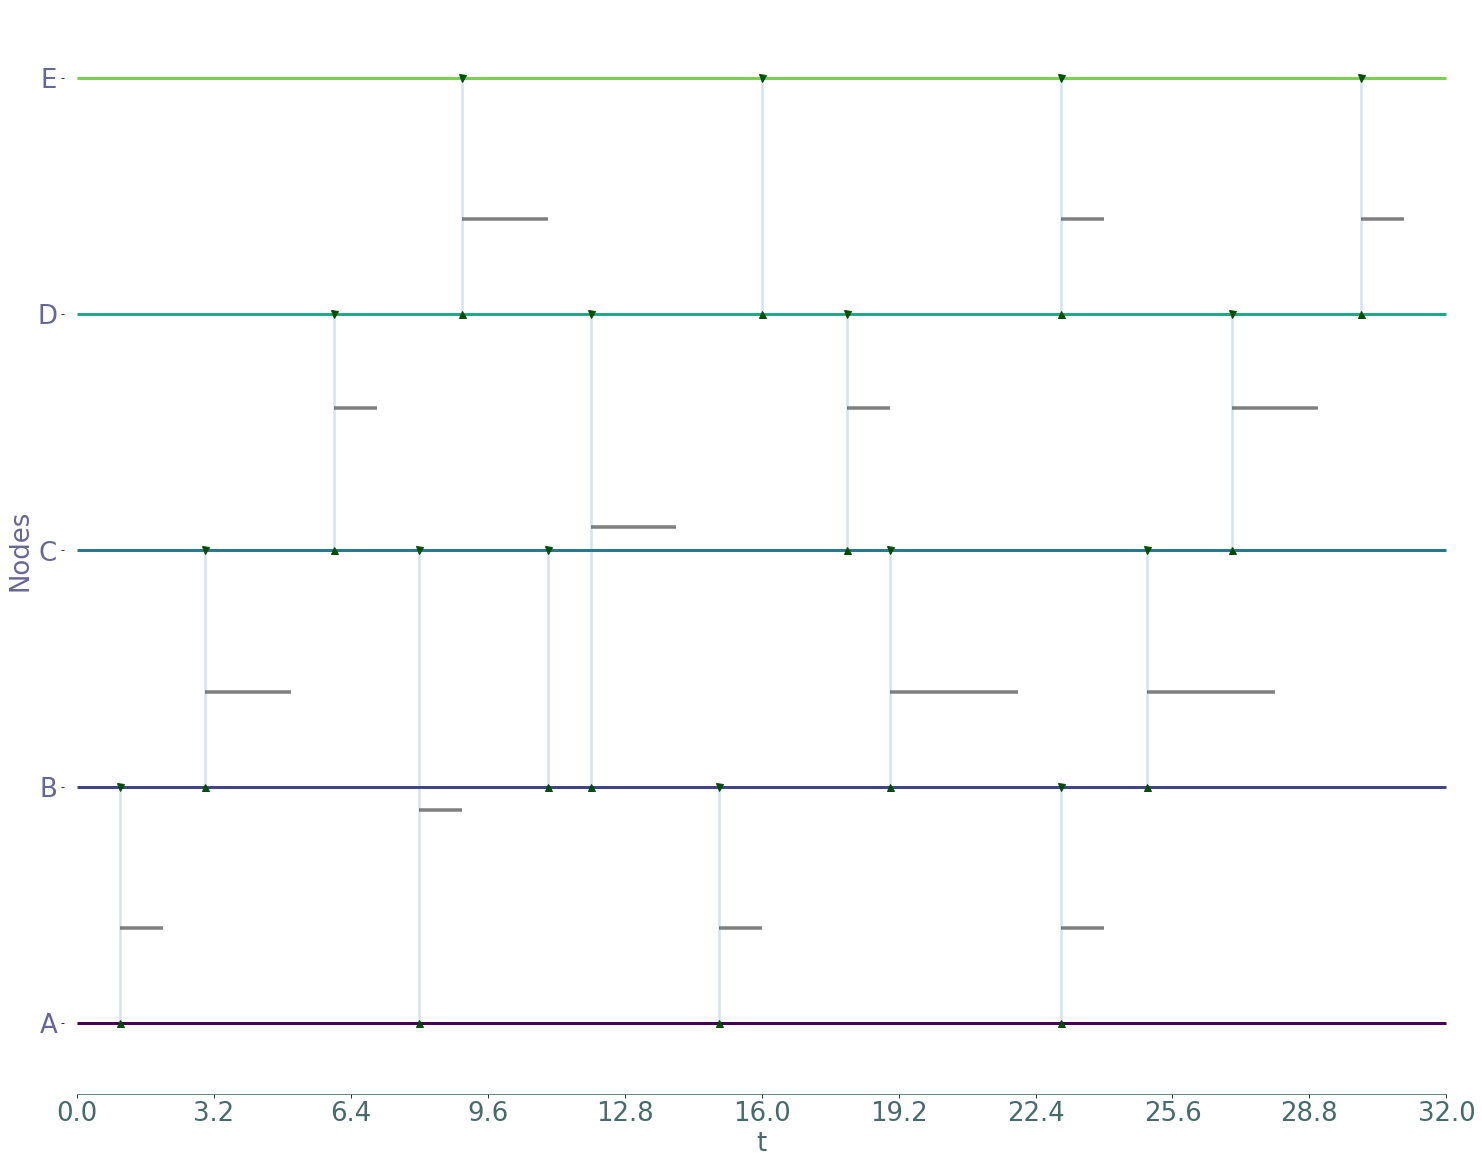

In [4]:
S.plot()

In [5]:
for i in range(0,2*int(max(list(S.event_times())))):
    S.add_point(i/2)
nouveau = S.fragmented_stream_graph()

In [6]:
len(nouveau.event_times())

65

<AxesSubplot:xlabel='t', ylabel='Nodes'>

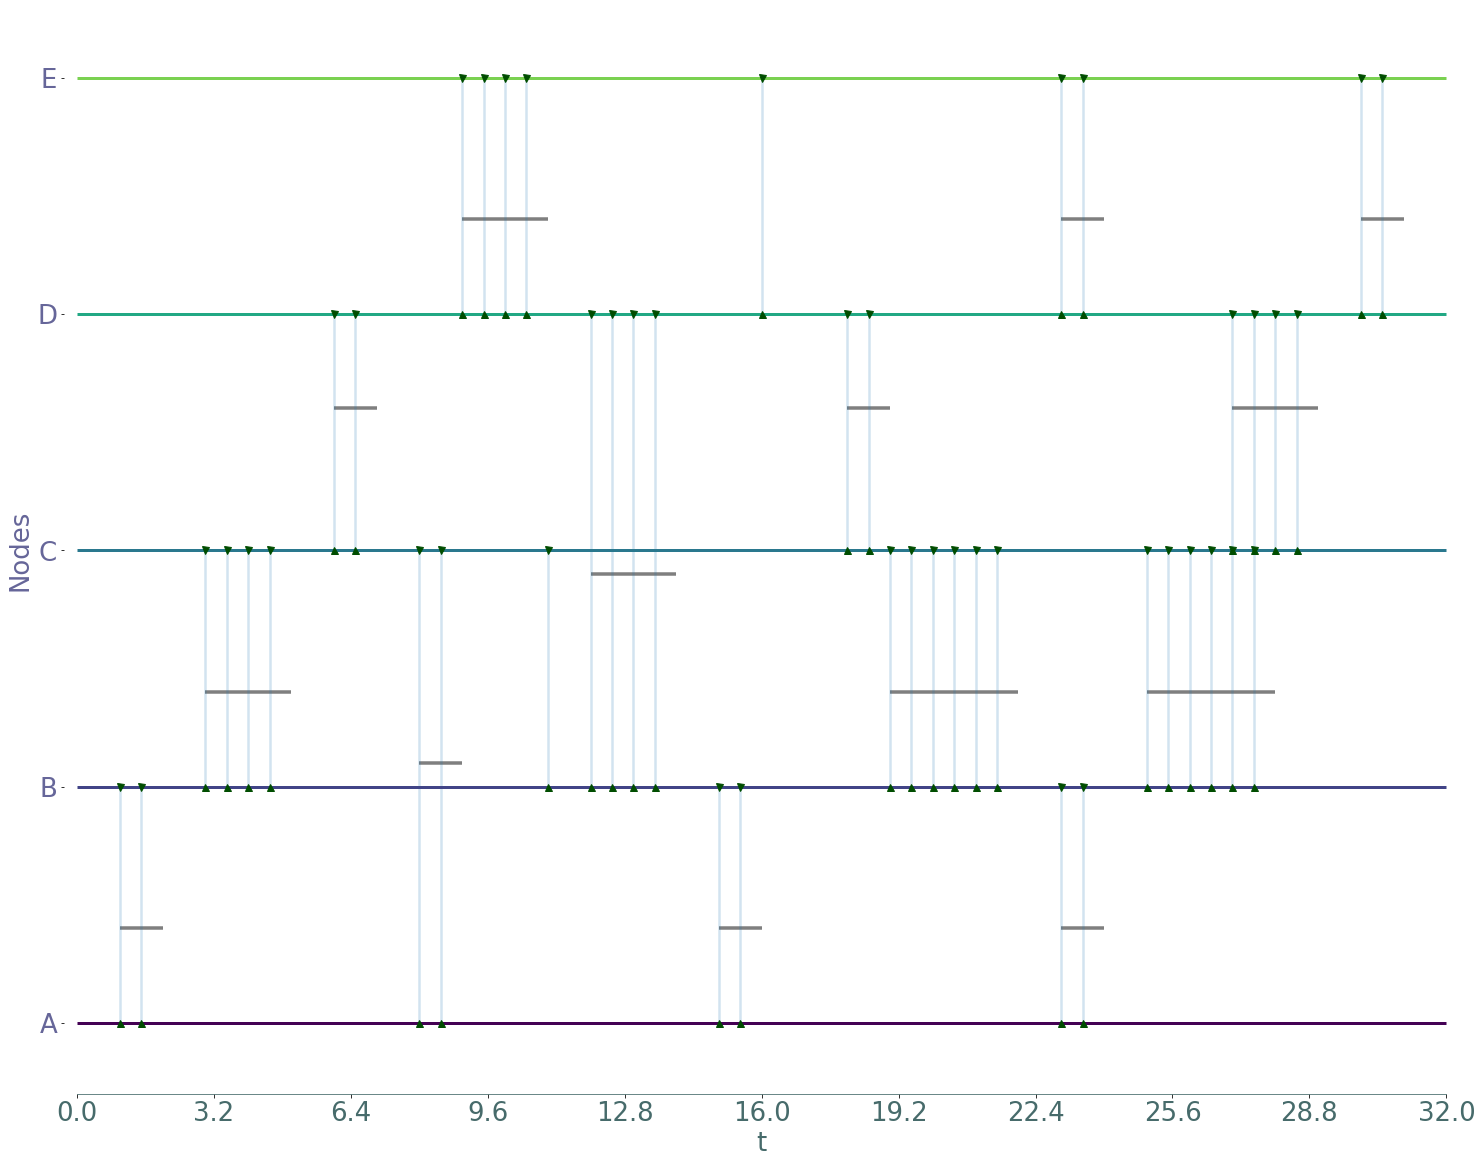

In [7]:
nouveau.plot()

In [8]:
node = 0
ll = nouveau.metapaths(node)
print("result : ")
i=0
for el in ll:
    for e in el:
        print (e)
        i += 1
print (i)

result : 
 0 (23.0, 23.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.0, 15.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (23.5, 24.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.0, 1.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.5, 2.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.5, 16.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.0, 15.5) 1 (20.5, 21.0) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (15.5, 16.0) 1 (20.0, 20.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (23.5, 24.0) 1 (25.5, 26.0) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (1.0, 1.5) 1 (3.0, 3.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (1.5, 2.0) 1 (11.0, 11.0) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³
 0 (15.0, 15.5) 1 (26.5, 27.0) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (1.0, 1.5) 1 (4.5, 5.0) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (1.5, 2.0) 1 (25.5, 26.0) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (1.5, 2.0) 1 (20.5, 21.0) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (23.5, 24.0) 1 (26.5, 27

 0 (1.0, 1.5) 1 (3.5, 4.0) 2 (18.0, 18.5) 3 (30.5, 31.0) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (15.5, 16.0) 1 (26.0, 26.5) 2 (28.0, 28.5) 3 (30.0, 30.5) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (1.5, 2.0) 1 (26.5, 27.0) 2 (27.5, 28.0) 3 (30.5, 31.0) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (1.0, 1.5) 1 (4.5, 5.0) 2 (6.0, 6.5) 3 (30.5, 31.0) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (15.0, 15.5) 1 (25.0, 25.5) 2 (27.0, 27.5) 3 (30.0, 30.5) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (15.5, 16.0) 1 (27.0, 27.5) 2 (28.0, 28.5) 3 (30.5, 31.0) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (15.0, 15.5) 1 (21.0, 21.5) 2 (27.0, 27.5) 3 (30.0, 30.5) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (1.0, 1.5) 1 (27.5, 28.0) 2 (28.5, 29.0) 3 (30.0, 30.5) 4 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 2.0·x⁴ + 0.0·x⁵
 0 (15.5, 16.0) 1 (26.5, 27.0)

In [9]:
ll = nouveau.filter_fastest_metapaths_slow( nouveau.metapaths(node))
print("result : ")
i=0
res = []
for el in ll:
    for e in el.values():
        for j in e:
            res.append(j)
            print (j)
            i += 1
print(i)

result : 
 0 (23.0, 23.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.0, 15.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (23.5, 24.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.0, 1.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.5, 2.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.5, 16.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.5, 2.0) 1 (3.0, 3.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (8.0, 8.5) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.5, 16.0) 1 (19.0, 19.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (23.5, 24.0) 1 (25.0, 25.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (8.5, 9.0) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (23.5, 24.0) 1 (26.0, 26.5) 2 (27.0, 27.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (23.5, 24.0) 1 (26.5, 27.0) 2 (27.0, 27.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (23.5, 24.0) 1 (25.0, 25.5) 2 (27.0, 27.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (23.5, 24.0) 1 (27.0, 27.5) 2 (27.0, 27.5) 3 | volume = 0.0 + 0.0·x¹ 

In [10]:
l = nouveau.fastest_paths_from_vertex(node,0)
print("resultat : ")
res2=[]
i=0
for el in l:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res2.append(ee)
print(i)

resultat : 
 0 (1.0, 1.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.5, 2.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.0, 15.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.5, 16.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (23.0, 23.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (23.5, 24.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (8.0, 8.5) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (8.5, 9.0) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.5, 2.0) 1 (3.0, 3.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (15.5, 16.0) 1 (19.0, 19.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (23.5, 24.0) 1 (25.0, 25.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (1.5, 2.0) 1 (3.5, 4.0) 2 (6.0, 6.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (1.5, 2.0) 1 (4.0, 4.5) 2 (6.0, 6.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (1.5, 2.0) 1 (3.0, 3.5) 2 (6.0, 6.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (1.5, 2.0) 1 (4.5, 5.0) 2 (6.0, 6.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.

In [11]:
lll = nouveau.fastest_paths_from_vertex(node,1)
print("resultat : ")
res3=[]
i=0
for el in lll:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res3.append(ee)
print(i)

resultat : 
 0 (1.0, 1.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.5, 2.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.0, 15.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (15.5, 16.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (23.0, 23.5) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (23.5, 24.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (8.5, 9.0) 2 (11.0, 11.0) 1 | volume = 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³
 0 (8.0, 8.5) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (8.5, 9.0) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (1.5, 2.0) 1 (3.0, 3.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (15.5, 16.0) 1 (19.0, 19.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (23.5, 24.0) 1 (25.0, 25.5) 2 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³
 0 (8.5, 9.0) 2 (11.0, 11.0) 1 (12.0, 12.5) 3 | volume = 0.0 + 0.0·x¹ + 1.0·x² + 0.0·x³ + 0.0·x⁴
 0 (1.5, 2.0) 1 (3.5, 4.0) 2 (6.0, 6.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (1.5, 2.0) 1 (4.0, 4.5) 2 (6.0, 6.5) 3 | volume = 0.0 + 0.0·x¹ + 0.0·x² + 1.5·x³ + 0.0·x⁴
 0 (1.5, 2.

In [12]:
llll = nouveau.count_walks_paper(node)
print("resultat : ")

resultat : 


In [13]:
#cur_best
print(llll[1][5])

IndexError: list index out of range

In [14]:
#pre
print(llll[0][5])

IndexError: list index out of range

In [15]:
#cur_best
print(llll[1][4])

{0.0: (-inf, inf), 1.0: (-inf, inf), 2.0: (-inf, inf), 1.5: (-inf, inf), 3.0: (-inf, inf), 3.5: (-inf, inf), 4.0: (-inf, inf), 4.5: (-inf, inf), 8.0: (-inf, inf), 8.5: (-inf, inf), 9.0: (2.0, 4), 5.0: (-inf, inf), 11.0: (2.0, 4), 12.0: (2.0, 4), 12.5: (2.0, 4), 15.5: (2.0, 4), 15.0: (2.0, 4), 16.0: (9.0, 4), 13.0: (2.0, 4), 19.0: (9.0, 4), 19.5: (9.0, 4), 20.0: (9.0, 4), 20.5: (9.0, 4), 23.5: (16.0, 4), 23.0: (16.0, 4), 24.0: (16.0, 4), 21.0: (9.0, 4), 21.5: (9.0, 4), 22.0: (9.0, 4), 25.0: (16.0, 4), 25.5: (16.0, 4), 26.0: (16.0, 4), 26.5: (16.0, 4), 27.0: (16.0, 4), 27.5: (16.0, 4), 28.0: (16.0, 4), 6.0: (-inf, inf), 6.5: (-inf, inf), 7.0: (-inf, inf), 30.0: (24.0, 4), 31.0: (24.0, 4), 32.0: (24.0, 4), 7.5: (-inf, inf), 9.5: (2.0, 4), 10.0: (2.0, 4), 10.5: (2.0, 4), 2.5: (-inf, inf), 11.5: (2.0, 4), 13.5: (2.0, 4), 14.0: (2.0, 4), 14.5: (2.0, 4), 16.5: (9.0, 4), 17.0: (9.0, 4), 17.5: (9.0, 4), 18.0: (9.0, 4), 18.5: (9.0, 4), 22.5: (9.0, 4), 24.5: (16.0, 4), 5.5: (-inf, inf), 28.5: (16

In [16]:
#pre
print(llll[0][4])

{0.0: {}, 1.0: {}, 2.0: {}, 1.5: {}, 3.0: {}, 3.5: {}, 4.0: {}, 4.5: {}, 8.0: {}, 8.5: {}, 9.0: {(3, 6.0): (9.0, 9.0), (3, 6.5): (9.0, 9.0), (3, 7.0): (9.0, 9.0)}, 5.0: {}, 11.0: {(3, 6.0): (10.5, 11.0), (3, 6.5): (10.5, 11.0), (3, 7.0): (10.5, 11.0)}, 12.0: {}, 12.5: {}, 15.5: {}, 15.0: {}, 16.0: {(3, 12.0): (16.0, 16.0), (3, 12.5): (16.0, 16.0), (3, 13.0): (16.0, 16.0), (3, 13.5): (16.0, 16.0), (3, 14.0): (16.0, 16.0)}, 13.0: {}, 19.0: {}, 19.5: {}, 20.0: {}, 20.5: {}, 23.5: {(3, 19.0): (23.0, 23.5)}, 23.0: {(3, 19.0): (23.0, 23.0)}, 24.0: {(3, 19.0): (23.5, 24.0)}, 21.0: {}, 21.5: {}, 22.0: {}, 25.0: {}, 25.5: {}, 26.0: {}, 26.5: {}, 27.0: {}, 27.5: {}, 28.0: {}, 6.0: {}, 6.5: {}, 7.0: {}, 30.0: {(3, 27.0): (30.0, 30.0), (3, 27.5): (30.0, 30.0), (3, 28.0): (30.0, 30.0), (3, 28.5): (30.0, 30.0), (3, 29.0): (30.0, 30.0)}, 31.0: {(3, 27.0): (30.5, 31.0), (3, 27.5): (30.5, 31.0), (3, 28.0): (30.5, 31.0), (3, 28.5): (30.5, 31.0), (3, 29.0): (30.5, 31.0)}, 32.0: {}, 7.5: {}, 9.5: {(3, 6.0

In [17]:
#cur_best
print(llll[1][3])

{0.0: (-inf, inf), 1.0: (-inf, inf), 2.0: (-inf, inf), 1.5: (-inf, inf), 3.0: (-inf, inf), 3.5: (-inf, inf), 4.0: (-inf, inf), 4.5: (-inf, inf), 8.0: (2.0, 3), 8.5: (2.0, 3), 9.0: (2.0, 3), 5.0: (-inf, inf), 11.0: (2.0, 3), 12.0: (9.0, 3), 12.5: (9.0, 3), 15.5: (9.0, 3), 15.0: (9.0, 3), 16.0: (9.0, 3), 13.0: (9.0, 3), 19.0: (16.0, 3), 19.5: (16.0, 3), 20.0: (16.0, 3), 20.5: (16.0, 3), 23.5: (16.0, 3), 23.0: (16.0, 3), 24.0: (16.0, 3), 21.0: (16.0, 3), 21.5: (16.0, 3), 22.0: (16.0, 3), 25.0: (16.0, 3), 25.5: (16.0, 3), 26.0: (16.0, 3), 26.5: (16.0, 3), 27.0: (24.0, 3), 27.5: (24.0, 3), 28.0: (24.0, 3), 6.0: (2.0, 3), 6.5: (2.0, 3), 7.0: (2.0, 3), 30.0: (24.0, 3), 31.0: (24.0, 3), 32.0: (24.0, 3), 7.5: (2.0, 3), 9.5: (2.0, 3), 10.0: (2.0, 3), 10.5: (2.0, 3), 2.5: (-inf, inf), 11.5: (2.0, 3), 13.5: (9.0, 3), 14.0: (9.0, 3), 14.5: (9.0, 3), 16.5: (9.0, 3), 17.0: (9.0, 3), 17.5: (9.0, 3), 18.0: (9.0, 2), 18.5: (9.0, 2), 22.5: (16.0, 3), 24.5: (16.0, 3), 5.5: (-inf, inf), 28.5: (24.0, 3), 29

In [18]:
#pre
print(llll[0][3])

{0.0: {}, 1.0: {}, 2.0: {}, 1.5: {}, 3.0: {}, 3.5: {}, 4.0: {}, 4.5: {}, 8.0: {}, 8.5: {}, 9.0: {}, 5.0: {}, 11.0: {}, 12.0: {(1, 11.0): (12.0, 12.0)}, 12.5: {(1, 11.0): (12.0, 12.5)}, 15.5: {}, 15.0: {}, 16.0: {}, 13.0: {(1, 11.0): (12.5, 13.0)}, 19.0: {(2, 19.0): (18.5, 19.0)}, 19.5: {}, 20.0: {}, 20.5: {}, 23.5: {}, 23.0: {}, 24.0: {}, 21.0: {}, 21.5: {}, 22.0: {}, 25.0: {}, 25.5: {}, 26.0: {}, 26.5: {}, 27.0: {(2, 25.0): (27.0, 27.0), (2, 25.5): (27.0, 27.0), (2, 26.0): (27.0, 27.0), (2, 26.5): (27.0, 27.0), (2, 27.0): (27.0, 27.0)}, 27.5: {(2, 25.0): (27.0, 27.5), (2, 25.5): (27.0, 27.5), (2, 26.0): (27.0, 27.5), (2, 26.5): (27.0, 27.5), (2, 27.0): (27.0, 27.5), (2, 27.5): (27.0, 27.5)}, 28.0: {(2, 25.0): (27.5, 28.0), (2, 25.5): (27.5, 28.0), (2, 26.0): (27.5, 28.0), (2, 26.5): (27.5, 28.0), (2, 27.0): (27.5, 28.0), (2, 27.5): (27.5, 28.0), (2, 28.0): (27.5, 28.0)}, 6.0: {(2, 3.0): (6.0, 6.0), (2, 3.5): (6.0, 6.0), (2, 4.0): (6.0, 6.0), (2, 4.5): (6.0, 6.0), (2, 5.0): (6.0, 6.0)}

In [19]:
#cur_best
print(llll[1][2])

{0.0: (-inf, inf), 1.0: (-inf, inf), 2.0: (-inf, inf), 1.5: (-inf, inf), 3.0: (2.0, 2), 3.5: (2.0, 2), 4.0: (2.0, 2), 4.5: (2.0, 2), 8.0: (8.0, 1), 8.5: (8.5, 1), 9.0: (9.0, 1), 5.0: (2.0, 2), 11.0: (9.0, 1), 12.0: (9.0, 1), 12.5: (9.0, 1), 15.5: (9.0, 1), 15.0: (9.0, 1), 16.0: (9.0, 1), 13.0: (9.0, 1), 19.0: (16.0, 2), 19.5: (16.0, 2), 20.0: (16.0, 2), 20.5: (16.0, 2), 23.5: (16.0, 2), 23.0: (16.0, 2), 24.0: (16.0, 2), 21.0: (16.0, 2), 21.5: (16.0, 2), 22.0: (16.0, 2), 25.0: (24.0, 2), 25.5: (24.0, 2), 26.0: (24.0, 2), 26.5: (24.0, 2), 27.0: (24.0, 2), 27.5: (24.0, 2), 28.0: (24.0, 2), 6.0: (2.0, 2), 6.5: (2.0, 2), 7.0: (2.0, 2), 30.0: (24.0, 2), 31.0: (24.0, 2), 32.0: (24.0, 2), 7.5: (2.0, 2), 9.5: (9.0, 1), 10.0: (9.0, 1), 10.5: (9.0, 1), 2.5: (-inf, inf), 11.5: (9.0, 1), 13.5: (9.0, 1), 14.0: (9.0, 1), 14.5: (9.0, 1), 16.5: (9.0, 1), 17.0: (9.0, 1), 17.5: (9.0, 1), 18.0: (9.0, 1), 18.5: (9.0, 1), 22.5: (16.0, 2), 24.5: (16.0, 2), 5.5: (2.0, 2), 28.5: (24.0, 2), 29.0: (24.0, 2), 29.

In [20]:
#pre
print(llll[0][2])

{0.0: {}, 1.0: {}, 2.0: {}, 1.5: {}, 3.0: {(1, 2.0): (3.0, 3.0)}, 3.5: {(1, 2.0): (3.0, 3.5)}, 4.0: {(1, 2.0): (3.5, 4.0)}, 4.5: {(1, 2.0): (4.0, 4.5)}, 8.0: {(0, 8.0): (8.0, 8.0)}, 8.5: {(0, 8.5): (8.0, 8.5)}, 9.0: {(0, 9.0): (8.5, 9.0)}, 5.0: {(1, 2.0): (4.5, 5.0)}, 11.0: {}, 12.0: {}, 12.5: {}, 15.5: {}, 15.0: {}, 16.0: {}, 13.0: {}, 19.0: {(1, 16.0): (19.0, 19.0)}, 19.5: {(1, 16.0): (19.0, 19.5)}, 20.0: {(1, 16.0): (19.5, 20.0)}, 20.5: {(1, 16.0): (20.0, 20.5)}, 23.5: {}, 23.0: {}, 24.0: {}, 21.0: {(1, 16.0): (20.5, 21.0)}, 21.5: {(1, 16.0): (21.0, 21.5)}, 22.0: {(1, 16.0): (21.5, 22.0)}, 25.0: {(1, 24.0): (25.0, 25.0)}, 25.5: {(1, 24.0): (25.0, 25.5)}, 26.0: {(1, 24.0): (25.5, 26.0)}, 26.5: {(1, 24.0): (26.0, 26.5)}, 27.0: {(1, 24.0): (26.5, 27.0)}, 27.5: {(1, 24.0): (27.0, 27.5)}, 28.0: {(1, 24.0): (27.5, 28.0)}, 6.0: {}, 6.5: {}, 7.0: {}, 30.0: {}, 31.0: {}, 32.0: {}, 7.5: {}, 9.5: {}, 10.0: {}, 10.5: {}, 2.5: {}, 11.5: {}, 13.5: {}, 14.0: {}, 14.5: {}, 16.5: {}, 17.0: {}, 17.5:

In [21]:
print(llll[0][2][29])

{}


In [22]:
#cur_best
print(llll[1][1])

{0.0: (-inf, inf), 1.0: (1.0, 1), 2.0: (2.0, 1), 1.5: (1.5, 1), 3.0: (2.0, 1), 3.5: (2.0, 1), 4.0: (2.0, 1), 4.5: (2.0, 1), 8.0: (2.0, 1), 8.5: (2.0, 1), 9.0: (2.0, 1), 5.0: (2.0, 1), 11.0: (9.0, 2), 12.0: (9.0, 2), 12.5: (9.0, 2), 15.5: (15.5, 1), 15.0: (15.0, 1), 16.0: (16.0, 1), 13.0: (9.0, 2), 19.0: (16.0, 1), 19.5: (16.0, 1), 20.0: (16.0, 1), 20.5: (16.0, 1), 23.5: (23.5, 1), 23.0: (23.0, 1), 24.0: (24.0, 1), 21.0: (16.0, 1), 21.5: (16.0, 1), 22.0: (16.0, 1), 25.0: (24.0, 1), 25.5: (24.0, 1), 26.0: (24.0, 1), 26.5: (24.0, 1), 27.0: (24.0, 1), 27.5: (24.0, 1), 28.0: (24.0, 1), 6.0: (2.0, 1), 6.5: (2.0, 1), 7.0: (2.0, 1), 30.0: (24.0, 1), 31.0: (24.0, 1), 32.0: (24.0, 1), 7.5: (2.0, 1), 9.5: (2.0, 1), 10.0: (2.0, 1), 10.5: (2.0, 1), 2.5: (2.0, 1), 11.5: (9.0, 2), 13.5: (9.0, 2), 14.0: (9.0, 2), 14.5: (9.0, 2), 16.5: (16.0, 1), 17.0: (16.0, 1), 17.5: (16.0, 1), 18.0: (16.0, 1), 18.5: (16.0, 1), 22.5: (16.0, 1), 24.5: (24.0, 1), 5.5: (2.0, 1), 28.5: (24.0, 1), 29.0: (24.0, 1), 29.5: (

In [23]:
#pre
print(llll[0][1])

{0.0: {}, 1.0: {(0, 1.0): (1.0, 1.0)}, 2.0: {(0, 2.0): (1.5, 2.0)}, 1.5: {(0, 1.5): (1.0, 1.5)}, 3.0: {}, 3.5: {}, 4.0: {}, 4.5: {}, 8.0: {}, 8.5: {}, 9.0: {}, 5.0: {}, 11.0: {(2, 9.0): (11.0, 11.0)}, 12.0: {}, 12.5: {}, 15.5: {(0, 15.5): (15.0, 15.5)}, 15.0: {(0, 15.0): (15.0, 15.0)}, 16.0: {(0, 16.0): (15.5, 16.0)}, 13.0: {}, 19.0: {}, 19.5: {}, 20.0: {}, 20.5: {}, 23.5: {(0, 23.5): (23.0, 23.5)}, 23.0: {(0, 23.0): (23.0, 23.0)}, 24.0: {(0, 24.0): (23.5, 24.0)}, 21.0: {}, 21.5: {}, 22.0: {}, 25.0: {}, 25.5: {}, 26.0: {}, 26.5: {}, 27.0: {}, 27.5: {}, 28.0: {}, 6.0: {}, 6.5: {}, 7.0: {}, 30.0: {}, 31.0: {}, 32.0: {}, 7.5: {}, 9.5: {}, 10.0: {}, 10.5: {}, 2.5: {}, 11.5: {}, 13.5: {}, 14.0: {}, 14.5: {}, 16.5: {}, 17.0: {}, 17.5: {}, 18.0: {}, 18.5: {}, 22.5: {}, 24.5: {}, 5.5: {}, 28.5: {}, 29.0: {}, 29.5: {}, 30.5: {}, 0.5: {}, 31.5: {}}


In [24]:
#cur_best
print(llll[1][0])

{0.0: (0.0, 0), 1.0: (1.0, 0), 2.0: (2.0, 0), 1.5: (1.5, 0), 3.0: (3.0, 0), 3.5: (3.5, 0), 4.0: (4.0, 0), 4.5: (4.5, 0), 8.0: (8.0, 0), 8.5: (8.5, 0), 9.0: (9.0, 0), 5.0: (5.0, 0), 11.0: (11.0, 0), 12.0: (12.0, 0), 12.5: (12.5, 0), 15.5: (15.5, 0), 15.0: (15.0, 0), 16.0: (16.0, 0), 13.0: (13.0, 0), 19.0: (19.0, 0), 19.5: (19.5, 0), 20.0: (20.0, 0), 20.5: (20.5, 0), 23.5: (23.5, 0), 23.0: (23.0, 0), 24.0: (24.0, 0), 21.0: (21.0, 0), 21.5: (21.5, 0), 22.0: (22.0, 0), 25.0: (25.0, 0), 25.5: (25.5, 0), 26.0: (26.0, 0), 26.5: (26.5, 0), 27.0: (27.0, 0), 27.5: (27.5, 0), 28.0: (28.0, 0), 6.0: (6.0, 0), 6.5: (6.5, 0), 7.0: (7.0, 0), 30.0: (30.0, 0), 31.0: (31.0, 0), 32.0: (32.0, 0), 7.5: (7.5, 0), 9.5: (9.5, 0), 10.0: (10.0, 0), 10.5: (10.5, 0), 2.5: (2.5, 0), 11.5: (11.5, 0), 13.5: (13.5, 0), 14.0: (14.0, 0), 14.5: (14.5, 0), 16.5: (16.5, 0), 17.0: (17.0, 0), 17.5: (17.5, 0), 18.0: (18.0, 0), 18.5: (18.5, 0), 22.5: (22.5, 0), 24.5: (24.5, 0), 5.5: (5.5, 0), 28.5: (28.5, 0), 29.0: (29.0, 0), 

In [25]:
#pre
print(llll[0][0])

{0.0: {(0, 0): (-1, -1)}, 1.0: {(0, 0): (-1, -1)}, 2.0: {(0, 0): (-1, -1)}, 1.5: {(0, 0): (-1, -1)}, 3.0: {(0, 0): (-1, -1)}, 3.5: {(0, 0): (-1, -1)}, 4.0: {(0, 0): (-1, -1)}, 4.5: {(0, 0): (-1, -1)}, 8.0: {(0, 0): (-1, -1)}, 8.5: {(0, 0): (-1, -1)}, 9.0: {(0, 0): (-1, -1)}, 5.0: {(0, 0): (-1, -1)}, 11.0: {(0, 0): (-1, -1)}, 12.0: {(0, 0): (-1, -1)}, 12.5: {(0, 0): (-1, -1)}, 15.5: {(0, 0): (-1, -1)}, 15.0: {(0, 0): (-1, -1)}, 16.0: {(0, 0): (-1, -1)}, 13.0: {(0, 0): (-1, -1)}, 19.0: {(0, 0): (-1, -1)}, 19.5: {(0, 0): (-1, -1)}, 20.0: {(0, 0): (-1, -1)}, 20.5: {(0, 0): (-1, -1)}, 23.5: {(0, 0): (-1, -1)}, 23.0: {(0, 0): (-1, -1)}, 24.0: {(0, 0): (-1, -1)}, 21.0: {(0, 0): (-1, -1)}, 21.5: {(0, 0): (-1, -1)}, 22.0: {(0, 0): (-1, -1)}, 25.0: {(0, 0): (-1, -1)}, 25.5: {(0, 0): (-1, -1)}, 26.0: {(0, 0): (-1, -1)}, 26.5: {(0, 0): (-1, -1)}, 27.0: {(0, 0): (-1, -1)}, 27.5: {(0, 0): (-1, -1)}, 28.0: {(0, 0): (-1, -1)}, 6.0: {(0, 0): (-1, -1)}, 6.5: {(0, 0): (-1, -1)}, 7.0: {(0, 0): (-1, -1)}, 

In [26]:
lat = nouveau.latencies(llll[1])
node_check = 3

In [27]:
lat

[{0.0: (0.0, 0),
  1.0: (1.0, 0),
  2.0: (2.0, 0),
  1.5: (1.5, 0),
  3.0: (3.0, 0),
  3.5: (3.5, 0),
  4.0: (4.0, 0),
  4.5: (4.5, 0),
  8.0: (8.0, 0),
  8.5: (8.5, 0),
  9.0: (9.0, 0),
  5.0: (5.0, 0),
  11.0: (11.0, 0),
  12.0: (12.0, 0),
  12.5: (12.5, 0),
  15.5: (15.5, 0),
  15.0: (15.0, 0),
  16.0: (16.0, 0),
  13.0: (13.0, 0),
  19.0: (19.0, 0),
  19.5: (19.5, 0),
  20.0: (20.0, 0),
  20.5: (20.5, 0),
  23.5: (23.5, 0),
  23.0: (23.0, 0),
  24.0: (24.0, 0),
  21.0: (21.0, 0),
  21.5: (21.5, 0),
  22.0: (22.0, 0),
  25.0: (25.0, 0),
  25.5: (25.5, 0),
  26.0: (26.0, 0),
  26.5: (26.5, 0),
  27.0: (27.0, 0),
  27.5: (27.5, 0),
  28.0: (28.0, 0),
  6.0: (6.0, 0),
  6.5: (6.5, 0),
  7.0: (7.0, 0),
  30.0: (30.0, 0),
  31.0: (31.0, 0),
  32.0: (32.0, 0),
  7.5: (7.5, 0),
  9.5: (9.5, 0),
  10.0: (10.0, 0),
  10.5: (10.5, 0),
  2.5: (2.5, 0),
  11.5: (11.5, 0),
  13.5: (13.5, 0),
  14.0: (14.0, 0),
  14.5: (14.5, 0),
  16.5: (16.5, 0),
  17.0: (17.0, 0),
  17.5: (17.5, 0),
  18.0: (1

In [28]:
lat[4]

{9.0: (2.0, 4), 16.0: (9.0, 4), 23.0: (16.0, 4), 30.0: (24.0, 4)}

In [29]:
#contri, prev_next = nouveau.contribution_each_latency(lat)

In [30]:
#contri

In [31]:
#prev_next

In [32]:
#prev_next[1]

In [33]:
G = nouveau.predecessor_graph(llll[0],node)

In [34]:
import networkx as nx
des = nx.descendants(G, (0,0))
des.add((0,0))
Gp = nx.subgraph(G,des)

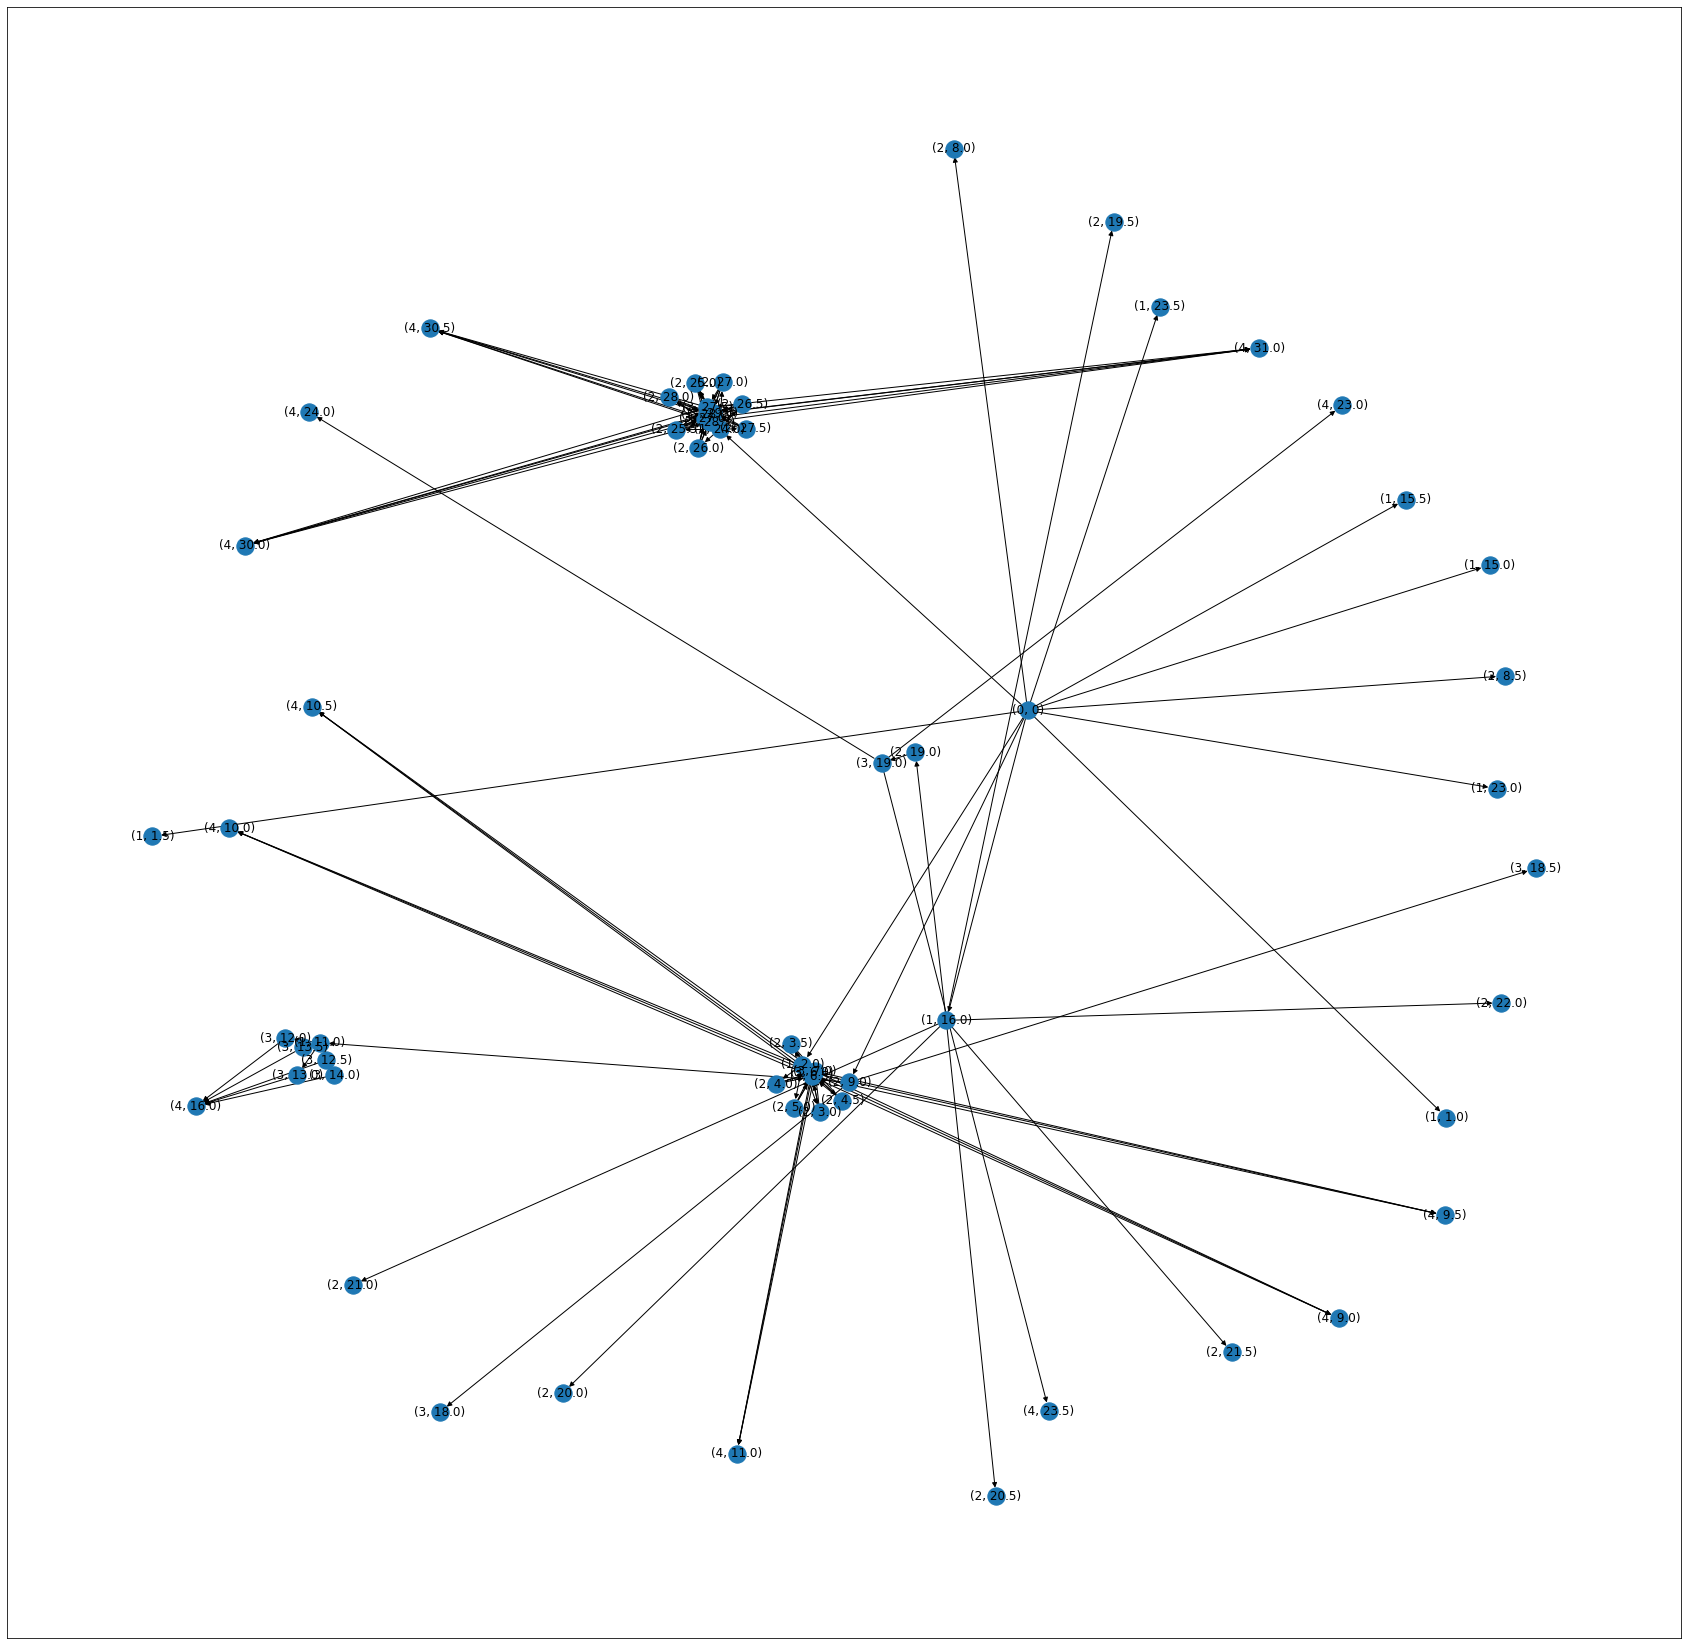

In [35]:
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(G,arrows=True,width = 1,ax = ax)

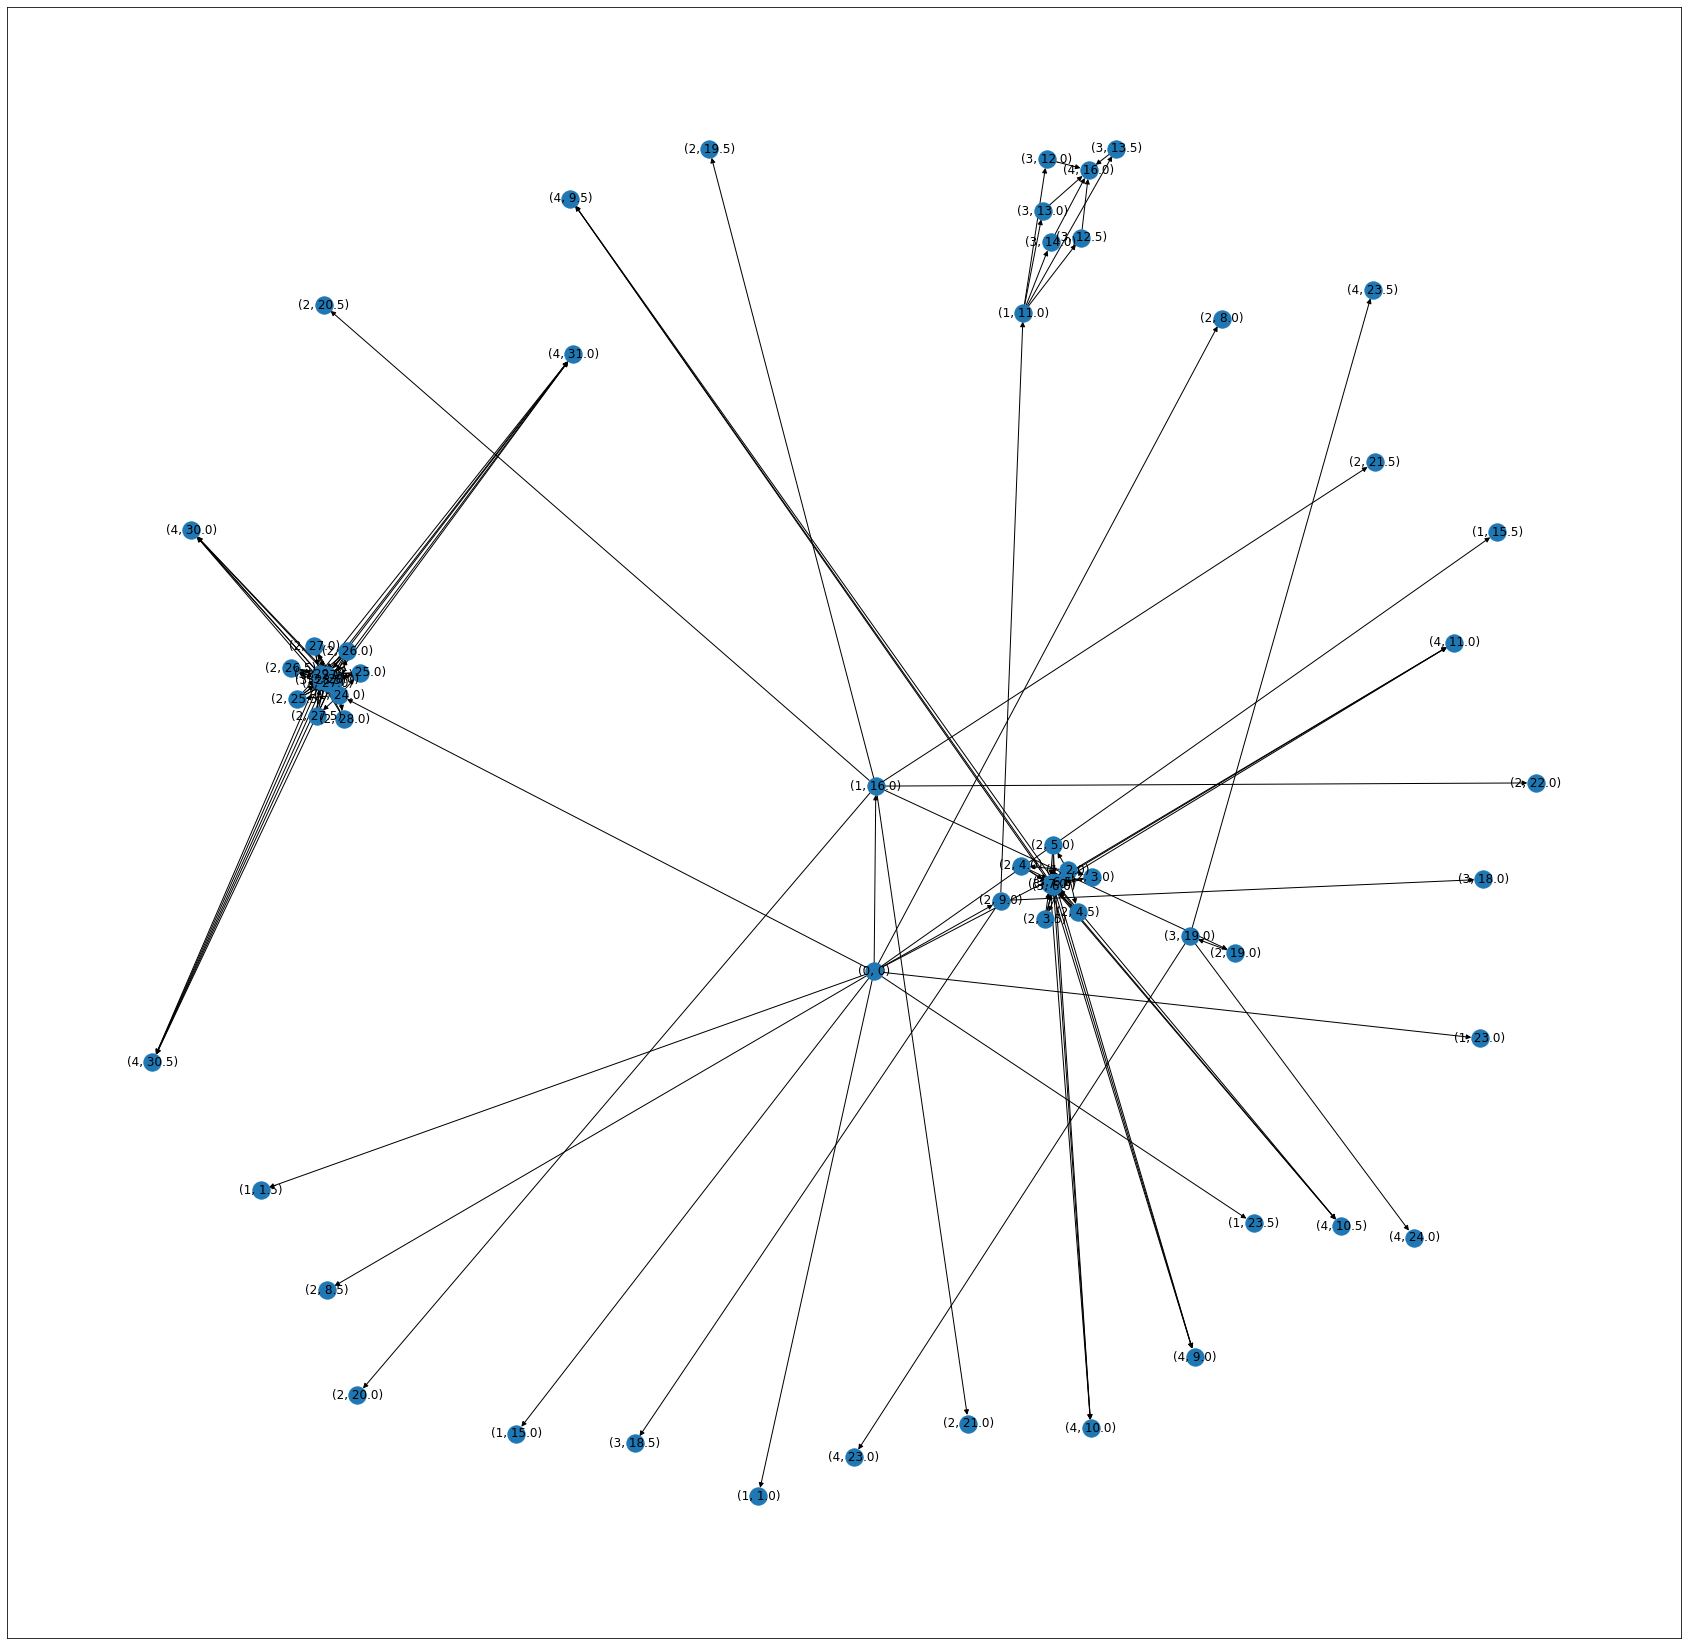

In [36]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(Gp,arrows=True,width = 1,ax = ax)

In [37]:
for e in Gp[(1,24)]:
    print(e)

(2, 25.0)
(2, 25.5)
(2, 26.0)
(2, 26.5)
(2, 27.0)
(2, 27.5)
(2, 28.0)


In [38]:
GG = nouveau.instant_metaedge_graphs(node, Gp)

***** start ***** (1, 1.0)
visit []
***** start ***** (1, 2.0)
visit [(2, 3.0), (2, 3.5), (2, 4.0), (2, 4.5), (2, 5.0)]
***** start ***** (2, 3.0)
visit [(3, 6.0), (3, 6.5), (3, 7.0)]
***** start ***** (3, 6.0)
visit [(4, 9.0), (4, 11.0), (4, 9.5), (4, 10.0), (4, 10.5)]
***** start ***** (4, 9.0)
visit []
***** start ***** (4, 11.0)
visit []
***** start ***** (4, 9.5)
visit []
***** start ***** (4, 10.0)
visit []
***** start ***** (4, 10.5)
visit []
***** start ***** (3, 6.5)
visit [(4, 9.0), (4, 11.0), (4, 9.5), (4, 10.0), (4, 10.5)]
***** start ***** (4, 9.0)
visit []
***** start ***** (4, 11.0)
visit []
***** start ***** (4, 9.5)
visit []
***** start ***** (4, 10.0)
visit []
***** start ***** (4, 10.5)
visit []
***** start ***** (3, 7.0)
visit [(4, 9.0), (4, 11.0), (4, 9.5), (4, 10.0), (4, 10.5)]
***** start ***** (4, 9.0)
visit []
***** start ***** (4, 11.0)
visit []
***** start ***** (4, 9.5)
visit []
***** start ***** (4, 10.0)
visit []
***** start ***** (4, 10.5)
visit []
***** 

In [39]:
for e in GG:
    print(e)

(10.5, 11.0)
(9.0, 9.5)
(9.5, 10.0)
(10.0, 10.5)
(6.0, 6.5)
(6.5, 7.0)
(3.0, 3.5)
(3.5, 4.0)
(4.0, 4.5)
(4.5, 5.0)
(18.5, 19.0)
(23.0, 23.5)
(23.5, 24.0)
(19.0, 19.5)
(19.5, 20.0)
(20.0, 20.5)
(20.5, 21.0)
(21.0, 21.5)
(21.5, 22.0)
(30.5, 31.0)
(30.0, 30.5)
(27.0, 27.5)
(27.5, 28.0)
(28.0, 28.5)
(28.5, 29.0)
(25.0, 25.5)
(25.5, 26.0)
(26.0, 26.5)
(26.5, 27.0)
(12.0, 12.5)
(12.5, 13.0)
(13.0, 13.5)
(13.5, 14.0)
(18.0, 18.5)


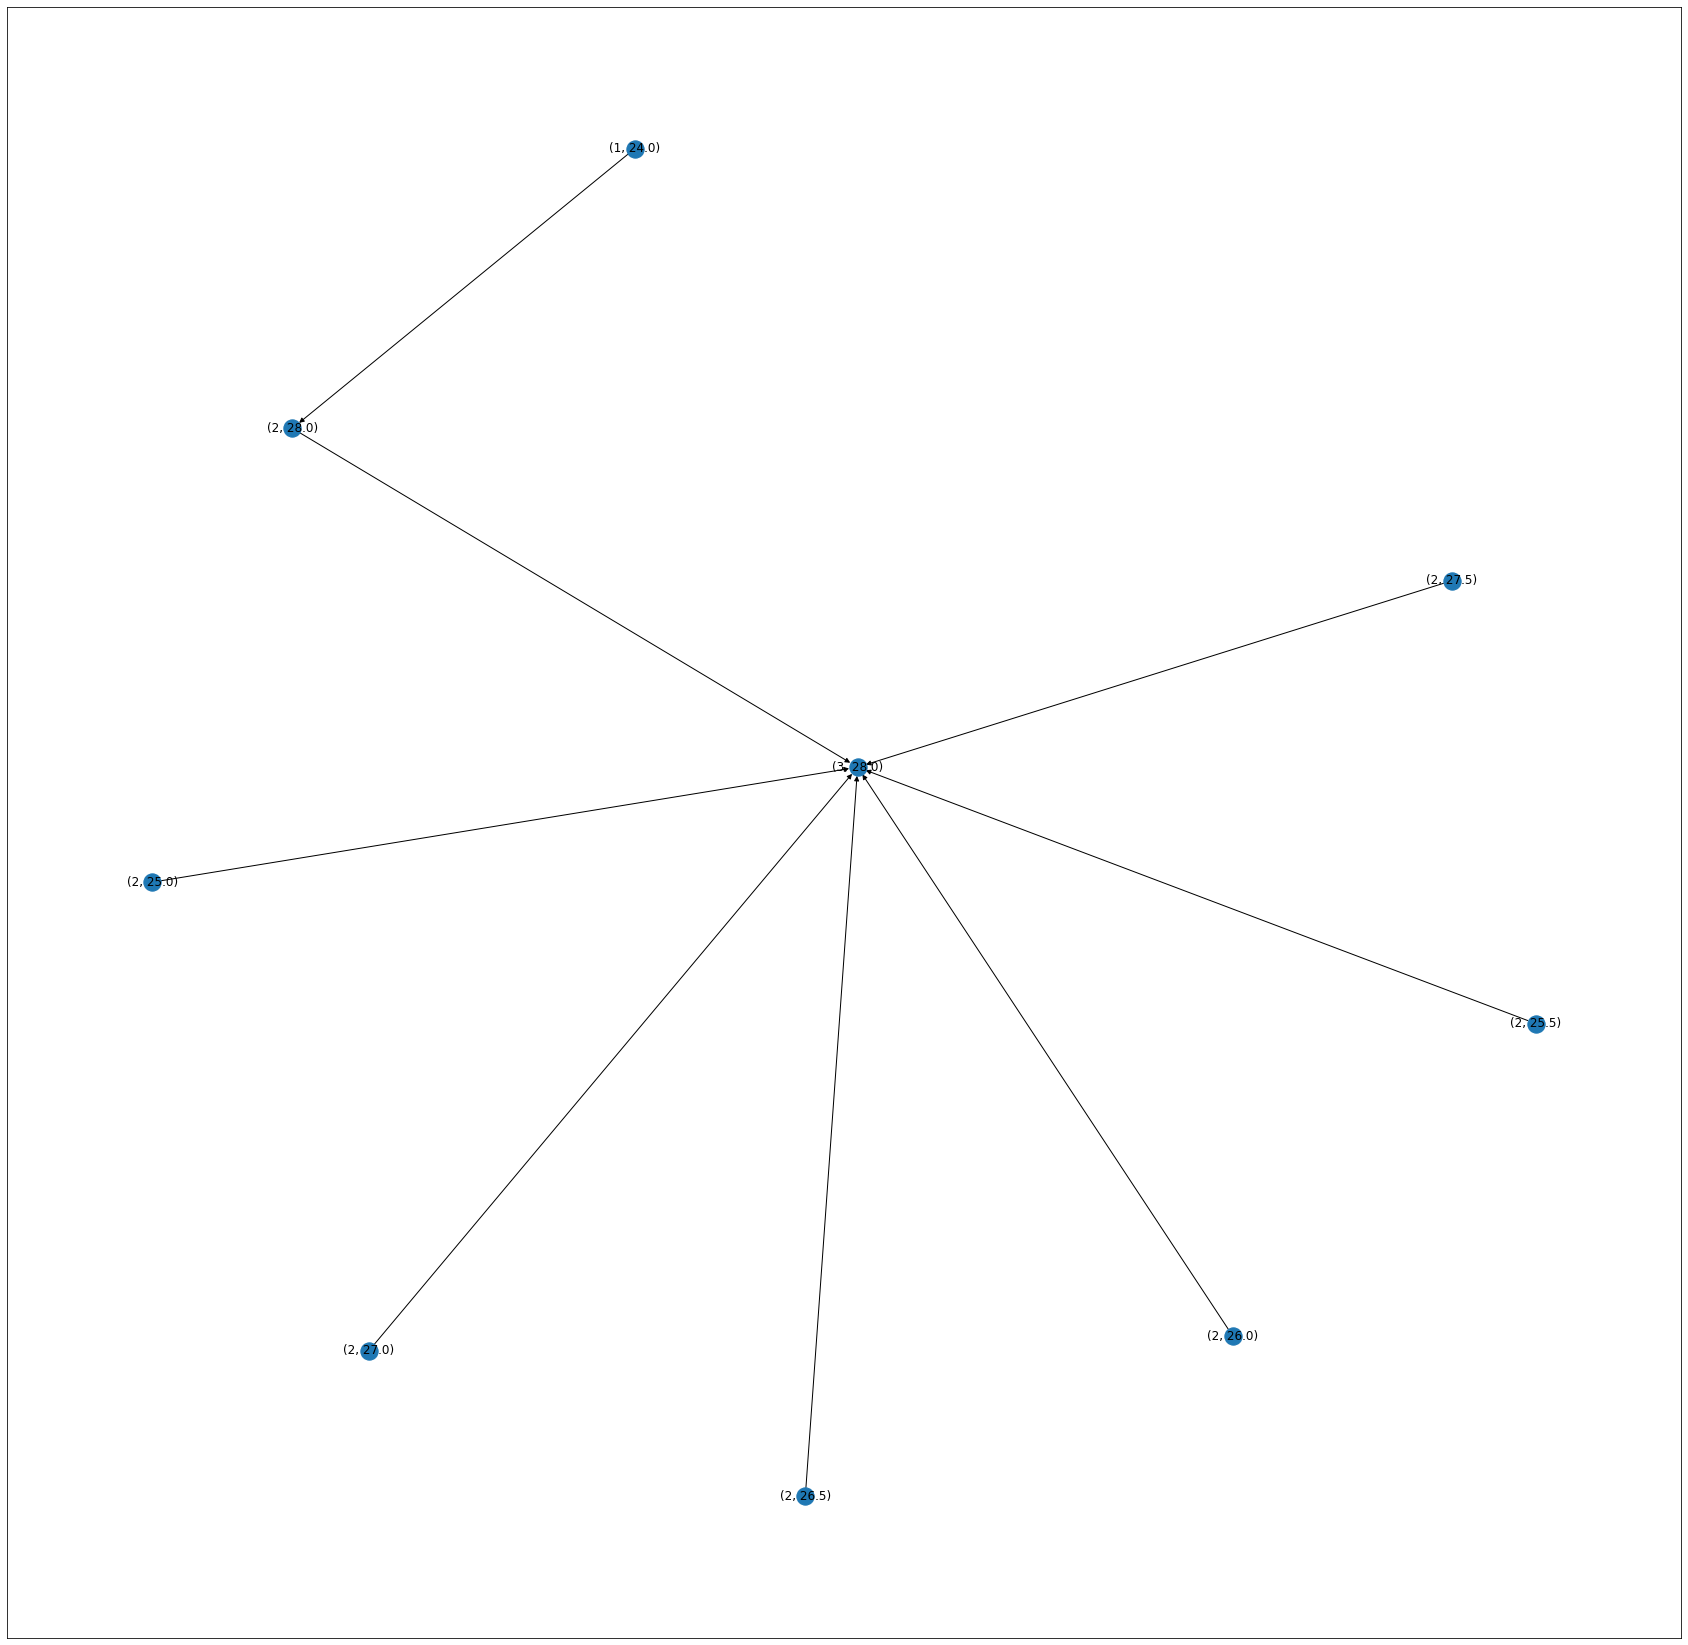

In [40]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GG[27.5,28],arrows=True,width = 1,ax = ax)

In [41]:
GG[27.5,28][(1,24.0)][(2,28.0)]

{'weight': 1}

In [42]:
#verifier que c'est dans l'ordre
Gp.nodes()

NodeView(((0, 0), (1, 1.0), (1, 2.0), (1, 1.5), (2, 9.0), (1, 11.0), (1, 15.5), (1, 15.0), (1, 16.0), (1, 23.5), (1, 23.0), (1, 24.0), (2, 3.0), (2, 3.5), (2, 4.0), (2, 4.5), (2, 8.0), (2, 8.5), (2, 5.0), (2, 19.0), (2, 19.5), (2, 20.0), (2, 20.5), (2, 21.0), (2, 21.5), (2, 22.0), (2, 25.0), (2, 25.5), (2, 26.0), (2, 26.5), (2, 27.0), (2, 27.5), (2, 28.0), (3, 12.0), (3, 12.5), (3, 13.0), (3, 19.0), (3, 27.0), (3, 27.5), (3, 28.0), (3, 6.0), (3, 6.5), (3, 7.0), (3, 13.5), (3, 14.0), (3, 18.0), (3, 18.5), (3, 28.5), (3, 29.0), (4, 9.0), (4, 11.0), (4, 16.0), (4, 23.5), (4, 23.0), (4, 24.0), (4, 30.0), (4, 31.0), (4, 9.5), (4, 10.0), (4, 10.5), (4, 30.5)))

In [43]:
TG = nouveau.transitive_closure_dag(GG[27.5,28], topo_order=None)

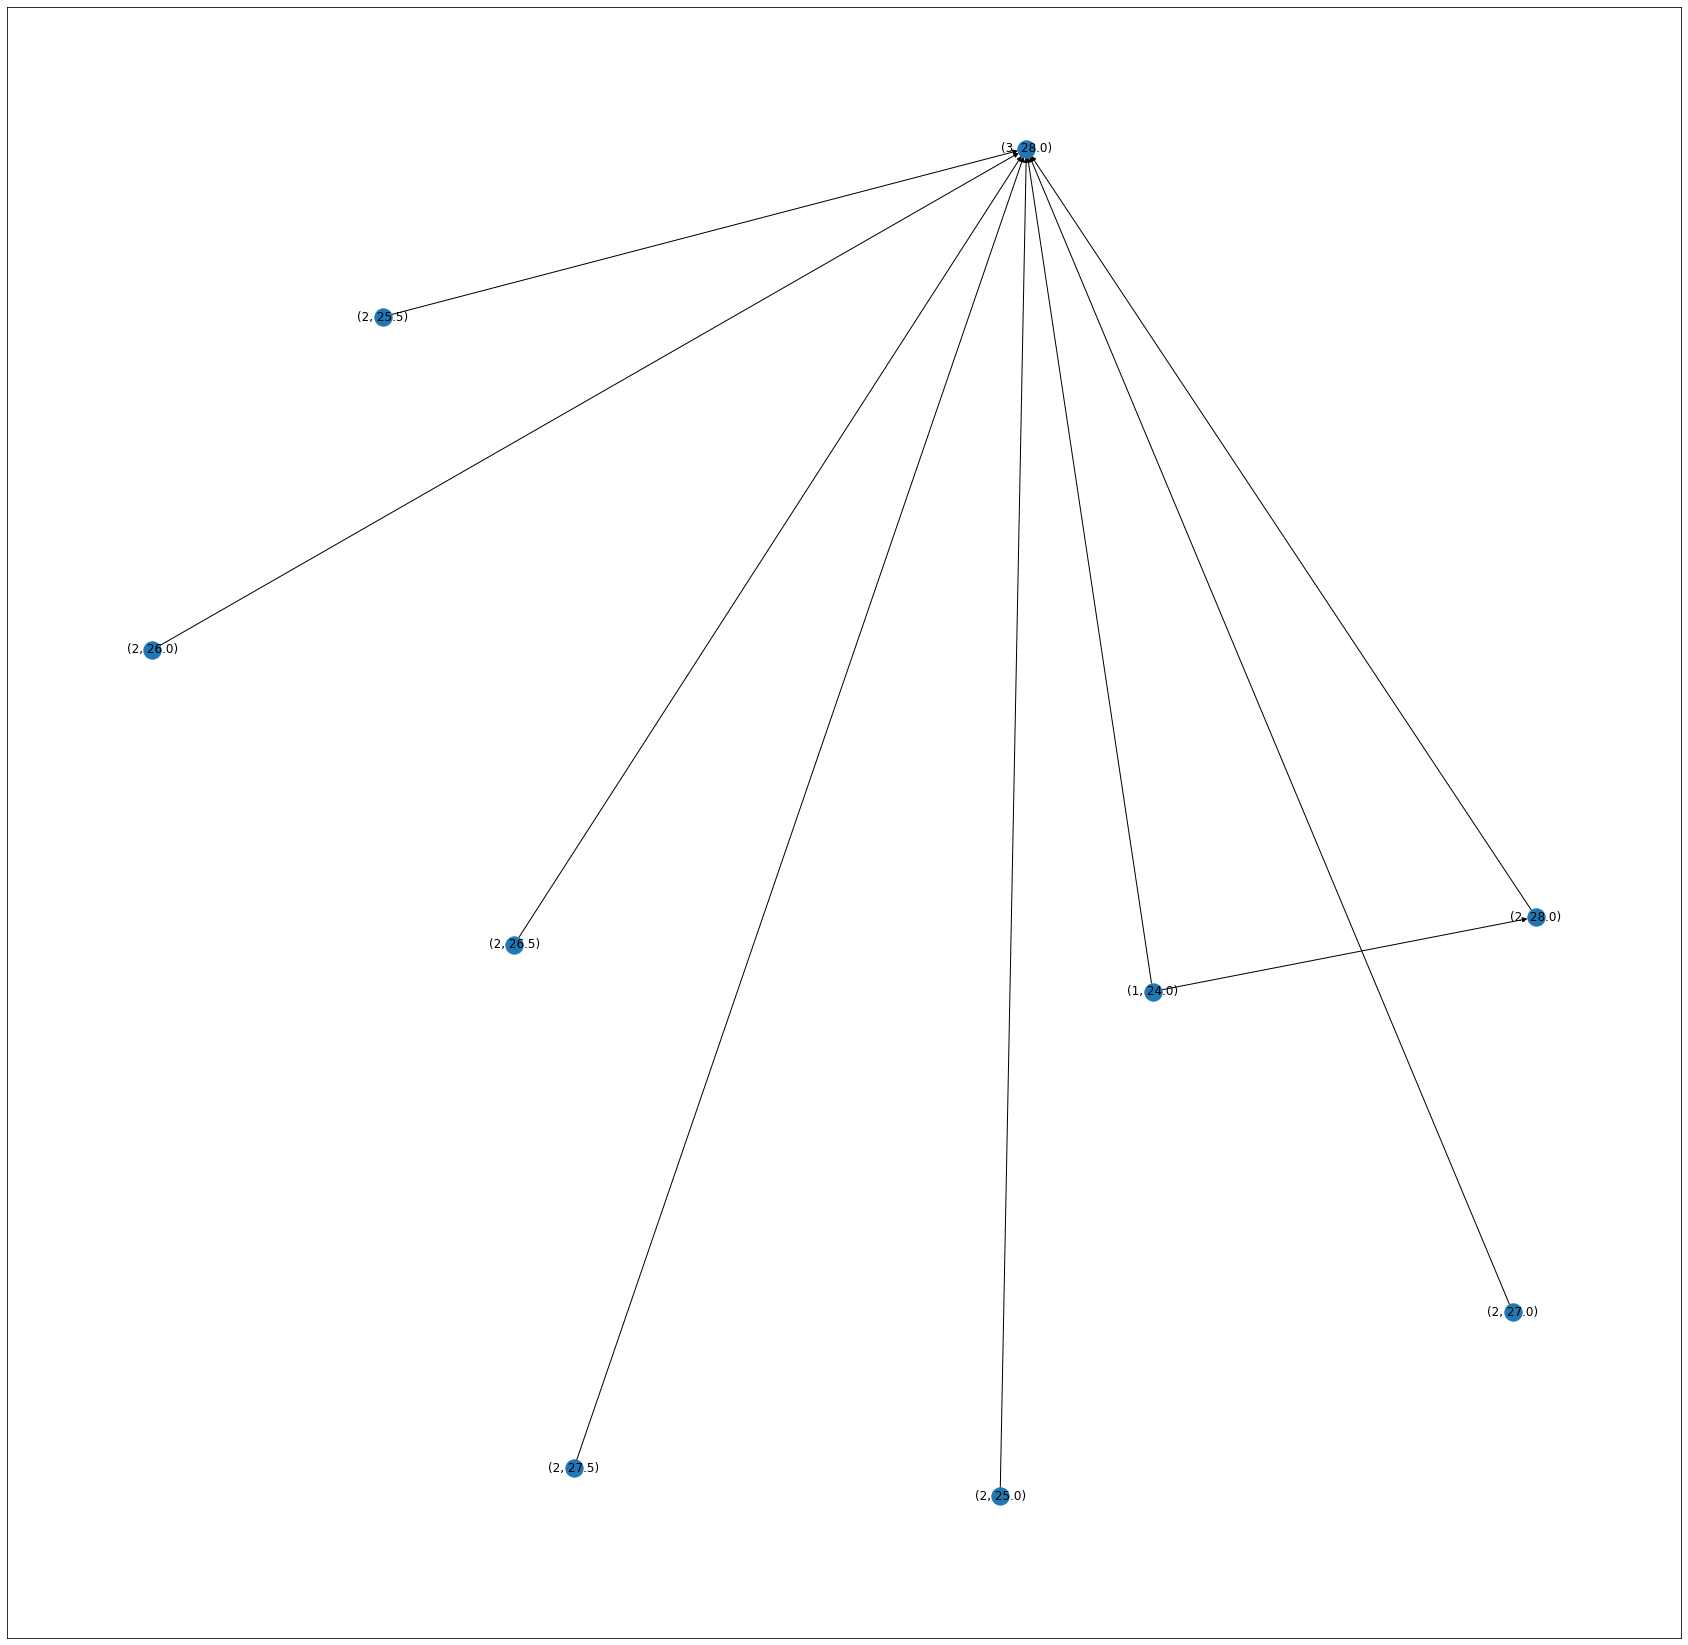

In [45]:
import networkx as nx
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(TG,arrows=True,width = 1,ax = ax)

In [46]:
TG[1,24][3,28]

{'wieght': 2}

In [44]:
(list(nx.simple_cycles(Gp)))

[]

In [40]:
temp_node = (1,11)
for e in nx.all_simple_paths(Gp,(0,0.0),temp_node):
    print(e)

[(0, 0.0), (2, 9.0), (1, 11.0)]


In [41]:
paths = nx.all_simple_paths(Gp,(0,0.0),temp_node)
for path in map(nx.utils.pairwise, paths):
    #print(list(path))
    for e in path:
        print(G[e[0]][e[1]]['interval'],end="")
    print("")
    

(8.5, 9.0)(11.0, 11.0)


In [42]:
temp_node = (2,3)
for e in nx.all_simple_paths(Gp,(0,0.0),temp_node):
    print(e)

[(0, 0.0), (1, 2.0), (2, 3.0)]


In [43]:
paths = nx.all_simple_paths(Gp,(0,0.0),temp_node)
for path in map(nx.utils.pairwise, paths):
    #print(list(path))
    for e in path:
        print(G[e[0]][e[1]]['interval'],end="")
    print("")
    

(1.5, 2.0)(3.0, 3.0)


In [44]:
sigma = nouveau.volume_metapaths(node, Gp)

node (1, 1.0)
last (1.0, 1.0) before_last (-1, -1) b True instantenous True
poly  (1, 1.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (1, 2.0)
last (1.5, 2.0) before_last (-1, -1) b True instantenous True
poly  (1, 2.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (2, 3.0)
last (3.0, 3.0) before_last (1.5, 2.0) b True instantenous True
poly  (2, 3.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 6.0)
last (6.0, 6.0) before_last (3.0, 3.0) b True instantenous False
poly  (3, 6.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 9.0)
last (9.0, 9.0) before_last (6.0, 6.0) b True instantenous False
poly  (4, 9.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 11.0)
last (10.5, 11.0) before_last (6.0, 6.0) b False instantenous False
poly  (4, 11.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 9.5)
last (9.0, 9.5) before_last (6.0, 6.0) b False instantenous False
poly  (4, 9.5) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 10.0)
last (9.5, 10.0) before_last (6.0, 6.0) b False 

node (3, 7.0)
last (6.5, 7.0) before_last (4.0, 4.5) b False instantenous False
poly  (3, 7.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 9.0)
last (9.0, 9.0) before_last (6.5, 7.0) b False instantenous False
poly  (4, 9.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 11.0)
last (10.5, 11.0) before_last (6.5, 7.0) b False instantenous False
poly  (4, 11.0) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (4, 9.5)
last (9.0, 9.5) before_last (6.5, 7.0) b False instantenous False
poly  (4, 9.5) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (4, 10.0)
last (9.5, 10.0) before_last (6.5, 7.0) b False instantenous False
poly  (4, 10.0) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (4, 10.5)
last (10.0, 10.5) before_last (6.5, 7.0) b False instantenous False
poly  (4, 10.5) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (2, 5.0)
last (4.5, 5.0) before_last (1.5, 2.0) b False instantenous True
poly  (2, 5.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 6.0)
last (6.0, 6.0) befor

last (30.0, 30.0) before_last (28.5, 29.0) b False instantenous False
poly  (4, 30.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 31.0)
last (30.5, 31.0) before_last (28.5, 29.0) b False instantenous False
poly  (4, 31.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 30.5)
last (30.0, 30.5) before_last (28.5, 29.0) b False instantenous False
poly  (4, 30.5) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (2, 25.5)
last (25.0, 25.5) before_last (23.5, 24.0) b False instantenous True
poly  (2, 25.5) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (3, 27.0)
last (27.0, 27.0) before_last (25.0, 25.5) b False instantenous False
poly  (3, 27.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 30.0)
last (30.0, 30.0) before_last (27.0, 27.0) b False instantenous False
poly  (4, 30.0) 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
node (4, 31.0)
last (30.5, 31.0) before_last (27.0, 27.0) b False instantenous False
poly  (4, 31.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 30.5)
last (30.0,

poly  (3, 28.5) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 30.0)
last (30.0, 30.0) before_last (28.0, 28.5) b False instantenous False
poly  (4, 30.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 31.0)
last (30.5, 31.0) before_last (28.0, 28.5) b False instantenous False
poly  (4, 31.0) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (4, 30.5)
last (30.0, 30.5) before_last (28.0, 28.5) b False instantenous False
poly  (4, 30.5) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (3, 29.0)
last (28.5, 29.0) before_last (27.0, 27.5) b False instantenous False
poly  (3, 29.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 30.0)
last (30.0, 30.0) before_last (28.5, 29.0) b False instantenous False
poly  (4, 30.0) 0.0 + 0.0·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
node (4, 31.0)
last (30.5, 31.0) before_last (28.5, 29.0) b False instantenous False
poly  (4, 31.0) 0.0 + 0.0·x¹ + 0.0·x² + 0.125·x³ + 0.0·x⁴
node (4, 30.5)
last (30.0, 30.5) before_last (28.5, 29.0) b False instantenous False
pol

In [45]:
for e in sigma.keys():
    print(e,sigma[e])

(1, 1.0) (Polynomial([1., 0., 0., 0., 0.], domain=[-1,  1], window=[-1,  1]), False, -1)
(1, 2.0) (Polynomial([1.], domain=[-1,  1], window=[-1,  1]), True, 0)
(2, 3.0) (Polynomial([1., 0., 0., 0., 0.], domain=[-1,  1], window=[-1,  1]), False, -1)
(3, 6.0) (Polynomial([1., 2.], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(4, 9.0) (Polynomial([1., 3., 2.], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(4, 11.0) (Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(4, 9.5) (Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(4, 10.0) (Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(4, 10.5) (Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(3, 6.5) (Polynomial([0. , 0.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(3, 7.0) (Polynomial([0. , 0.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]), False, -1)
(2, 3.5) (Polynomial([0. , 0.5, 0.

In [46]:
sigma[temp_node]

(Polynomial([1., 0., 0., 0., 0.], domain=[-1,  1], window=[-1,  1]), False, -1)

In [47]:
sigma[(3,27.5)][0]

Polynomial([0.   , 0.5  , 1.125], domain=[-1.,  1.], window=[-1.,  1.])

In [48]:
sigma[(3,28)][0]

Polynomial([0.   , 0.5  , 1.375], domain=[-1.,  1.], window=[-1.,  1.])

In [49]:
sigma[(4,16)][0]

Polynomial([1., 2.], domain=[-1.,  1.], window=[-1.,  1.])

In [50]:
sigma_r = nouveau.volume_metapaths_with_restingpaths(node, Gp, sigma)

noder (1, 1.0) predr (-1, -1) last inter (1.0, 1.0) before last inter (-1, -1) pred_depar -1 actual_depar 1.0
succ
noder (1, 1.5) predr (1, 1.0) last inter (1.0, 1.5) before last inter (-1, -1) pred_depar 1.0 actual_depar 1.5
succ
noder (1, 2.0) predr (1, 1.5) last inter (1.5, 2.0) before last inter (-1, -1) pred_depar 1.5 actual_depar 2.0
succ
noder (2, 3.0) predr (-1, -1) last inter (3.0, 3.0) before last inter (1.5, 2.0) pred_depar -1 actual_depar 2.0
succ
noder (3, 6.0) predr (-1, -1) last inter (6.0, 6.0) before last inter (3.0, 3.0) pred_depar -1 actual_depar 2.0
succ
noder (4, 9.0) predr (-1, -1) last inter (9.0, 9.0) before last inter (6.0, 6.0) pred_depar -1 actual_depar 2.0
succ
noder (4, 9.5) predr (4, 9.0) last inter (9.0, 9.5) before last inter (6.0, 6.0) pred_depar 2.0 actual_depar 2.0
succ
noder (4, 10.0) predr (4, 9.5) last inter (9.5, 10.0) before last inter (6.0, 6.0) pred_depar 2.0 actual_depar 2.0
succ
noder (4, 10.5) predr (4, 10.0) last inter (10.0, 10.5) before l

noder (3, 28.5) predr (3, 28.0) last inter (28.0, 28.5) before last inter (25.5, 26.0) pred_depar 24.0 actual_depar 24.0
succ
noder (4, 30.0) predr (-1, -1) last inter (30.0, 30.0) before last inter (28.0, 28.5) pred_depar -1 actual_depar 24.0
succ
noder (4, 30.5) predr (4, 30.0) last inter (30.0, 30.5) before last inter (28.0, 28.5) pred_depar 24.0 actual_depar 24.0
succ
noder (4, 31.0) predr (4, 30.5) last inter (30.5, 31.0) before last inter (28.0, 28.5) pred_depar 24.0 actual_depar 24.0
succ
noder (3, 29.0) predr (3, 28.5) last inter (28.5, 29.0) before last inter (25.5, 26.0) pred_depar 24.0 actual_depar 24.0
succ
noder (4, 30.0) predr (-1, -1) last inter (30.0, 30.0) before last inter (28.5, 29.0) pred_depar -1 actual_depar 24.0
succ
noder (4, 30.5) predr (4, 30.0) last inter (30.0, 30.5) before last inter (28.5, 29.0) pred_depar 24.0 actual_depar 24.0
succ
noder (4, 31.0) predr (4, 30.5) last inter (30.5, 31.0) before last inter (28.5, 29.0) pred_depar 24.0 actual_depar 24.0
suc

In [51]:
for e in sigma_r.keys():
    print(e,sigma_r[e][1])

(0, 0) 0.0
(1, 1.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
(1, 1.5) 1.0
(1, 2.0) 1.0
(2, 3.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
(3, 6.0) 1.0 + 2.0·x¹
(4, 9.0) 1.0 + 3.0·x¹ + 2.0·x²
(4, 9.5) 1.0 + 3.5·x¹ + 3.5·x² + 1.0·x³
(4, 10.0) 1.0 + 4.0·x¹ + 5.0·x² + 2.0·x³
(4, 10.5) 1.0 + 4.5·x¹ + 6.5·x² + 3.0·x³
(4, 11.0) 1.0 + 5.0·x¹ + 8.0·x² + 4.0·x³
(3, 6.5) 1.0 + 2.5·x¹ + 1.0·x²
(3, 7.0) 1.0 + 3.0·x¹ + 2.0·x²
(2, 3.5) 1.0 + 0.5·x¹
(2, 4.0) 1.0 + 1.0·x¹
(2, 4.5) 1.0 + 1.5·x¹
(2, 5.0) 1.0 + 2.0·x¹
(1, 15.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
(1, 15.5) 1.0
(1, 16.0) 1.0
(2, 19.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
(3, 19.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
(4, 23.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
(4, 23.5) 1.0 + 0.5·x¹
(4, 24.0) 1.0 + 1.0·x¹
(2, 19.5) 1.0 + 0.5·x¹
(2, 20.0) 1.0 + 1.0·x¹
(2, 20.5) 1.0 + 1.5·x¹
(2, 21.0) 1.0 + 2.0·x¹
(2, 21.5) 1.0 + 2.5·x¹
(2, 22.0) 1.0 + 3.0·x¹
(1, 23.0) 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
(1, 23.5) 1.0
(1, 24.0) 1.0
(2, 25.0)

In [52]:
for e in sigma.keys():
    sigma[e] = ((0,0),sigma[e][0])
    #print(e,sigma_r[e][1])

In [53]:
for e in sigma.keys():
    print(e,sigma[e])

(1, 1.0) ((0, 0), Polynomial([1., 0., 0., 0., 0.], domain=[-1,  1], window=[-1,  1]))
(1, 2.0) ((0, 0), Polynomial([1.], domain=[-1,  1], window=[-1,  1]))
(2, 3.0) ((0, 0), Polynomial([1., 0., 0., 0., 0.], domain=[-1,  1], window=[-1,  1]))
(3, 6.0) ((0, 0), Polynomial([1., 2.], domain=[-1.,  1.], window=[-1.,  1.]))
(4, 9.0) ((0, 0), Polynomial([1., 3., 2.], domain=[-1.,  1.], window=[-1.,  1.]))
(4, 11.0) ((0, 0), Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]))
(4, 9.5) ((0, 0), Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]))
(4, 10.0) ((0, 0), Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]))
(4, 10.5) ((0, 0), Polynomial([0. , 0.5, 1.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]))
(3, 6.5) ((0, 0), Polynomial([0. , 0.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]))
(3, 7.0) ((0, 0), Polynomial([0. , 0.5, 1. ], domain=[-1.,  1.], window=[-1.,  1.]))
(2, 3.5) ((0, 0), Polynomial([0. , 0.5, 0. , 0. , 0. ], domain=[-

In [54]:
sigma_r[(2, 4.0)]

((2, 3.5),
 Polynomial([1., 1.], domain=[-1.,  1.], window=[-1.,  1.]),
 False,
 -1)

In [55]:
sigma_r[(3, 7)][1]

Polynomial([1., 3., 2.], domain=[-1.,  1.], window=[-1.,  1.])

In [56]:
pre, cur_best = llll
events = list(nouveau.event_times())
events.sort()
close_arrival = nouveau.closest_arrival_contri(cur_best, events)

In [57]:
events_reverse = dict()
for i in range(0,len(events)):
    events_reverse[events[i]] = i 

In [58]:
print(events_reverse)

{0.0: 0, 0.5: 1, 1.0: 2, 1.5: 3, 2.0: 4, 2.5: 5, 3.0: 6, 3.5: 7, 4.0: 8, 4.5: 9, 5.0: 10, 5.5: 11, 6.0: 12, 6.5: 13, 7.0: 14, 7.5: 15, 8.0: 16, 8.5: 17, 9.0: 18, 9.5: 19, 10.0: 20, 10.5: 21, 11.0: 22, 11.5: 23, 12.0: 24, 12.5: 25, 13.0: 26, 13.5: 27, 14.0: 28, 14.5: 29, 15.0: 30, 15.5: 31, 16.0: 32, 16.5: 33, 17.0: 34, 17.5: 35, 18.0: 36, 18.5: 37, 19.0: 38, 19.5: 39, 20.0: 40, 20.5: 41, 21.0: 42, 21.5: 43, 22.0: 44, 22.5: 45, 23.0: 46, 23.5: 47, 24.0: 48, 24.5: 49, 25.0: 50, 25.5: 51, 26.0: 52, 26.5: 53, 27.0: 54, 27.5: 55, 28.0: 56, 28.5: 57, 29.0: 58, 29.5: 59, 30.0: 60, 30.5: 61, 31.0: 62, 31.5: 63, 32.0: 64}


In [59]:
contri, prev_next = nouveau.contribution_each_latency(lat, sigma_r, events_reverse)

lat[i] (1.0, 1) latj[j] (1.5, 1) node 1
ok = > lat[i] (1.0, 1) latj[j] (1.5, 1) node 1
lat[i] (1.5, 1) latj[j] (1.0, 1) node 1
ok = > lat[i] (1.5, 1) latj[j] (1.0, 1) node 1
lat[i] (1.5, 1) latj[j] (2.0, 1) node 1
ok = > lat[i] (1.5, 1) latj[j] (2.0, 1) node 1
lat[i] (2.0, 1) latj[j] (1.5, 1) node 1
ok = > lat[i] (2.0, 1) latj[j] (1.5, 1) node 1
lat[i] (15.0, 1) latj[j] (15.5, 1) node 1
ok = > lat[i] (15.0, 1) latj[j] (15.5, 1) node 1
lat[i] (15.5, 1) latj[j] (15.0, 1) node 1
ok = > lat[i] (15.5, 1) latj[j] (15.0, 1) node 1
lat[i] (15.5, 1) latj[j] (16.0, 1) node 1
ok = > lat[i] (15.5, 1) latj[j] (16.0, 1) node 1
lat[i] (16.0, 1) latj[j] (15.5, 1) node 1
ok = > lat[i] (16.0, 1) latj[j] (15.5, 1) node 1
lat[i] (23.0, 1) latj[j] (23.5, 1) node 1
ok = > lat[i] (23.0, 1) latj[j] (23.5, 1) node 1
lat[i] (23.5, 1) latj[j] (23.0, 1) node 1
ok = > lat[i] (23.5, 1) latj[j] (23.0, 1) node 1
lat[i] (23.5, 1) latj[j] (24.0, 1) node 1
ok = > lat[i] (23.5, 1) latj[j] (24.0, 1) node 1
lat[i] (24.0, 1

In [60]:
nodec = 4
lat[nodec]

{9.0: (2.0, 4), 16.0: (9.0, 4), 23.0: (16.0, 4), 30.0: (24.0, 4)}

In [61]:
contri[nodec]

{9.0: (0, 30.0), 16.0: (0, 30.0), 23.0: (0, 30.0), 30.0: (0, 32.0)}

In [62]:
prev_next[nodec]

{9.0: [16.0, 23.0], 16.0: [9.0, 23.0], 23.0: [16.0, 9.0]}

In [63]:
pointer = nouveau.pointers(sigma_r)
#print(pointer)
print(pointer[(1,27.5)])

(1, 24.0)


In [64]:
pointer2 = nouveau.pointers2(contri)
#print(pointer2)
#print(pointer2[(1,4)])

In [65]:
pointer3 = nouveau.pointers3(llll[1])
#print(pointer3)
#print(pointer3[(1,5)])

In [66]:
#vol_bet = nouveau.volume_between_direct_arrivals(node, G, pre)

In [67]:
#vv,tt = 2,27
#for e in vol_bet[vv][tt]:
#    print(e,vol_bet[vv][tt][e])

In [68]:
lat_rev = nouveau.latencies_rev(lat, events)
print(lat_rev[3])

{9.0: 12.0, 16.0: 19.0, 24.0: 27.0, 2.0: 6.0, 0.0: 0.0}


In [69]:
sigma_r[pointer[(1, 27.5)]][1]

Polynomial([1.], domain=[-1,  1], window=[-1,  1])

In [70]:
nouveau.delta_svvt( node, 3, 28.0, lat, contri, prev_next, sigma_r, pointer, pointer2,{},lat_rev)

call svvt,  s 0 v 3 t 28.0


0

In [71]:
141-56

85

In [72]:
#(v,t) = (1,27.5)
#print(node)
#nouveau.delta_svt(node, v, t, Gp, lat, contri, prev_next, sigma_r, pointer, pointer2, lat_rev)

In [73]:
contribution, partial = nouveau.contri_delta_svt(node, 1, 24, Gp, lat, contri, prev_next, sigma_r, {}, {}, {}, pointer, lat_rev, events, events_reverse, pre, {})

******** new call contri_delta_svt v 1 t 24
///////// call svvt,  s 0 v 1 t 24
t_contri 1 24
t_sigma 1 24.0
prev [24.0]
next [32.0]
vol_tv 1.0 [1.]
s_prime 24.0 s_left 24.0 a_right 32.0 a_prime 24
enum poly 0.0
actual enum -1
left 0 vol_tv 1.0 right 0
denum poly 1.0
actual denum 0
enum (0,) denum (1.0,)
contrib 0.0
end svvt 0.0
dic_nodes {25.0: [2], 25.5: [2], 26.0: [2], 26.5: [2], 27.0: [2], 27.5: [2], 28.0: [2]}
(w,t') (2, 28.0)
******** new call contri_delta_svt v 2 t 28.0
///////// call svvt,  s 0 v 2 t 28.0
dic_nodes {28.0: [3], 28.5: [3], 29.0: [3]}
(w,t') (3, 29.0)
******** new call contri_delta_svt v 3 t 29.0
///////// call svvt,  s 0 v 3 t 29.0
dic_nodes {30.0: [4], 31.0: [4], 30.5: [4]}
(w,t') (4, 31.0)
******** new call contri_delta_svt v 4 t 31.0
///////// call svvt,  s 0 v 4 t 31.0
dic_nodes {}
******** end call contri_delta_svt v 4 t 31.0 contribution[v][t] 0.0
divison_volume v 3 t 29.0 w 4 t_p 31.0
st1t2 0.0 + 0.5·x¹
chevauchement
coef_chevau 0.0 + 0.5·x¹ st1t2 0.0 + 0.5

******** end call contri_delta_svt v 4 t 31.0 contribution[v][t] 0.0
divison_volume v 3 t 28.5 w 4 t_p 31.0
st1t2 0.0 + 0.5·x¹
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
coef_chevau 0.0 + 0.5·x¹ st1t2 0.0 + 0.5·x¹
svt 1.0 + 3.5·x¹ + 4.0·x²
svt*st1t2 0.0 + 0.5·x¹ + 1.75·x² + 2.0·x³
actual svt 3
svt_hight (0, 0, 0, 2.0)
swtp 1.0 + 5.0·x¹ + 9.5·x² + 5.5·x³
actual swtp 3
swtp_high (0, 0, 0, 5.5)
res_div [0.36363636]
******** half call contri_delta_svt v 3 t 28.5 sum 0.0
u 4 dic_nodes[u] [30.0, 31.0, 30.5]
******** half after call contri_delta_svt v 3 t 28.5
dic_nodes[u] [30.0, 31.0, 30.5] u 4
v 3 t 28.5 event[jj] 30.5 dic_nodes[u][ii] 31.0 index actual event 61 index succ events 61 contri event time 30.5
comp vol 1.0 + 3.5·x¹ + 4.0·x² 1.0 + 4.0·x¹ + 5.5·x²
chevauchement_contri
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 +

coef_chevau 0.0 + 0.625·x¹ st1t2 0.0 + 0.5·x¹
svt 1.0
svt*st1t2 0.0 + 0.625·x¹
actual svt 1
svt_hight (0, 0.625)
swtp 1.0 + 2.5·x¹
actual swtp 1
swtp_high (0, 2.5)
res_div [0.25]
******** half call contri_delta_svt v 1 t 24 sum 13.636363636363637
u 2 dic_nodes[u] [25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0]
******** half after call contri_delta_svt v 1 t 24
dic_nodes[u] [25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0] u 2
v 1 t 24 event[jj] 27.0 dic_nodes[u][ii] 27.5 index actual event 54 index succ events 54 contri event time 27.0
comp vol 1.0 1.0
add_contri_local v 1 event[jjj] 27.0 w,t_p 2 27.5
la
divison_volume v 1 t 27.0 w 2 t_p 27.5
st1t2 0.0 + 0.5·x¹
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
coef_chevau 0.0 + 0.625·x¹ st1t2 0.0 + 0.5·x¹
svt 1.0
svt*st1t2 0.0 + 0.625·x¹
actual svt 1
svt_hight (0, 0.625)
swtp 1.0 + 2.5·x¹
actual swtp 1
swtp_high (0, 2.5)
re

dic_nodes {}
******** end call contri_delta_svt v 4 t 30.0 contribution[v][t] 48.0
divison_volume v 3 t 27.5 w 4 t_p 30.0
st1t2 1
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
coef_chevau 1.0 st1t2 1
svt 1.0 + 2.5·x¹ + 1.125·x²
svt*st1t2 1.0 + 2.5·x¹ + 1.125·x²
actual svt 2
svt_hight (0, 0, 1.125)
swtp 1.0 + 4.0·x¹ + 5.5·x²
actual swtp 2
swtp_high (0, 0, 5.5)
res_div [0.20454545]
******** half call contri_delta_svt v 3 t 27.5 sum 9.818181818181818
u 4 dic_nodes[u] [30.0, 31.0, 30.5]
******** half after call contri_delta_svt v 3 t 27.5
dic_nodes[u] [30.0, 31.0, 30.5] u 4
v 3 t 27.5 event[jj] 27.5 dic_nodes[u][ii] 30.0 index actual event 55 index succ events 55 contri event time 27.5
comp vol 1.0 + 2.5·x¹ + 1.125·x² 1.0 + 2.5·x¹ + 1.125·x²
v 3 t 27.5 event[jj] 27.5 dic_nodes[u][ii] 30.0 index actual event 55 index succ events 56 

v 3 t 28.0 event[jj] 30.5 dic_nodes[u][ii] 31.0 index actual event 61 index succ events 61 contri event time 30.5
comp vol 1.0 + 3.0·x¹ + 2.5·x² 1.0 + 4.0·x¹ + 5.5·x²
chevauchement_contri
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
(w,t') (4, 30.5)
******** new call contri_delta_svt v 4 t 30.5
///////// call svvt,  s 0 v 4 t 30.5
dic_nodes {}
******** end call contri_delta_svt v 4 t 30.5 contribution[v][t] 0.0
divison_volume v 3 t 28.0 w 4 t_p 30.5
st1t2 0.0 + 0.5·x¹
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
coef_chevau 0.0 + 0.5·x¹ st1t2 0.0 + 0.5·x¹
svt 1.0 + 3.0·x¹ + 2.5·x²
svt*st1t2 0.0 + 0.5·x¹ + 1.5·x² + 1.25·x

contrib_local[v][event[jjj]] 91.0909090909091 partial_sum[l_ord[ii]] 91.0909090909091 contribution[w][t_p] 116.18181818181819 res 0.3333333333333333
chevauchement_contri
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
(w,t') (2, 26.0)
******** new call contri_delta_svt v 2 t 26.0
///////// call svvt,  s 0 v 2 t 26.0
dic_nodes {27.0: [3], 27.5: [3], 28.0: [3], 28.5: [3], 29.0: [3]}
(w,t') (3, 29.0)
******** new call contri_delta_svt v 3 t 29.0
///////// call svvt,  s 0 v 3 t 29.0
dic_nodes {30.0: [4], 31.0: [4], 30.5: [4]}
(w,t') (4, 31.0)
******** new call contri_delta_svt v 4 t 31.0
///////// call svvt,  s 0 v 4 t 31.0
dic_nodes {}
******** end call contri_delta_svt v 4 t 31.0 contribution[v][t] 0.0
divison_volume v 3 t 29.0 w 4 t_p 31.0
st1t2 0.0 + 0.5·x¹
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 

v 3 t 27.0 event[jj] 30.5 dic_nodes[u][ii] 31.0 index actual event 61 index succ events 61 contri event time 30.5
comp vol 1.0 + 2.0·x¹ 1.0 + 4.0·x¹ + 5.5·x²
chevauchement_contri
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
1 26.5 0.0 + 0.5·x¹
(w,t') (4, 30.5)
******** new call contri_delta_svt v 4 t 30.5
///////// call svvt,  s 0 v 4 t 30.5
dic_nodes {}
******** end call contri_delta_svt v 4 t 30.5 contribution[v][t] 0.0
divison_volume v 3 t 27.0 w 4 t_p 30.5
st1t2 0.0 + 0.5·x¹
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
1 26.5 0.0 + 0.5·x¹
coef_chevau 0.0 + 0.5·x¹ st1t2 0.0 + 0.5·x¹
svt 1.0 + 2.0·x¹
svt*st1t2 0.0 + 0.

svt*st1t2 0.0 + 0.5·x¹ + 1.75·x² + 2.0·x³
actual svt 3
svt_hight (0, 0, 0, 2.0)
swtp 1.0 + 4.5·x¹ + 7.5·x² + 2.75·x³
actual swtp 3
swtp_high (0, 0, 0, 2.75)
res_div [0.72727273]
******** half call contri_delta_svt v 3 t 28.5 sum 0.0
u 4 dic_nodes[u] [30.0, 31.0, 30.5]
******** half after call contri_delta_svt v 3 t 28.5
dic_nodes[u] [30.0, 31.0, 30.5] u 4
v 3 t 28.5 event[jj] 30.0 dic_nodes[u][ii] 30.5 index actual event 60 index succ events 60 contri event time 30.0
comp vol 1.0 + 3.5·x¹ + 4.0·x² 1.0 + 4.0·x¹ + 5.5·x²
chevauchement_contri
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
1 26.5 0.0 + 0.5·x¹
1 26.0 0.0 + 0.5·x¹
(w,t') (4, 30.0)
******** new call contri_delta_svt v 4 t 30.0
dic_nodes {}
******** end call contri_delta_svt v 4 t 30.0 contribution[v][t] 48.0
divison_volume v 3 t 28.5 w 4 t_p 30.0
st1t2

st1t2 1
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
1 26.5 0.0 + 0.5·x¹
1 26.0 0.0 + 0.5·x¹
coef_chevau 1.0 st1t2 1
svt 1.0 + 0.5·x¹
svt*st1t2 1.0 + 0.5·x¹
actual svt 1
svt_hight (0, 0.5)
swtp 1.0 + 2.0·x¹
actual swtp 1
swtp_high (0, 2.0)
res_div [0.25]
contrib_local[v][event[jjj]] 38.72727272727273 partial_sum[l_ord[ii]] 38.72727272727273 contribution[w][t_p] 120.0 res 0.25
v 2 t 25.5 event[jj] 25.5 dic_nodes[u][ii] 27.0 index actual event 51 index succ events 52 contri event time 26.0
comp vol 1.0 + 0.5·x¹ 1.0 + 1.0·x¹
v 2 t 25.5 event[jj] 25.5 dic_nodes[u][ii] 27.0 index actual event 51 index succ events 53 contri event time 26.5
comp vol 1.0 + 0.5·x¹ 1.0 + 1.5·x¹
chevauchement_contri
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x

///////// call svvt,  s 0 v 4 t 31.0
dic_nodes {}
******** end call contri_delta_svt v 4 t 31.0 contribution[v][t] 0.0
divison_volume v 3 t 27.5 w 4 t_p 31.0
st1t2 0.0 + 0.5·x¹
chevauchement
3 31.0 0.0 + 0.5·x¹
3 30.5 0.0 + 0.5·x¹
3 30.0 1.0
2 29.0 0.0 + 0.5·x¹
2 28.5 0.0 + 0.5·x¹
2 28.0 0.0 + 0.5·x¹
2 27.5 0.0 + 0.5·x¹
2 27.0 1.0
1 28.0 0.0 + 0.0·x¹ + 0.125·x²
1 27.5 0.0 + 0.0·x¹ + 0.125·x²
1 27.0 0.0 + 0.5·x¹
1 26.5 0.0 + 0.5·x¹
1 26.0 0.0 + 0.5·x¹
1 25.5 0.0 + 0.5·x¹
coef_chevau 0.0 + 0.5·x¹ st1t2 0.0 + 0.5·x¹
svt 1.0 + 2.5·x¹ + 1.125·x²
svt*st1t2 0.0 + 0.5·x¹ + 1.25·x² + 0.5625·x³
actual svt 3
svt_hight (0, 0, 0, 0.5625)
swtp 1.0 + 5.0·x¹ + 9.5·x² + 5.5·x³
actual swtp 3
swtp_high (0, 0, 0, 5.5)
res_div [0.10227273]
******** half call contri_delta_svt v 3 t 27.5 sum 0.0
u 4 dic_nodes[u] [30.0, 31.0, 30.5]
******** half after call contri_delta_svt v 3 t 27.5
dic_nodes[u] [30.0, 31.0, 30.5] u 4
v 3 t 27.5 event[jj] 30.5 dic_nodes[u][ii] 31.0 index actual event 61 index succ events 61 

In [74]:
52.36 - 38.725

13.634999999999998

In [75]:
#contribution_finale = nouveau.contri_link_stream(contribution, partial, events, events_reverse, close_arrival, sigma_r, pointer)

In [76]:
for k in contribution:
    for e in contribution[k].keys():
        print(k,e,"=>" ,contribution[k][e])

4 31.0 => 0.0
4 30.5 => 0.0
4 30.0 => 48.0
3 30.5 => 0.0
3 30.0 => 0.0
3 29.0 => 48.0
3 29.5 => 48.0
3 28.5 => 34.90909090909091
3 28.0 => 21.818181818181817
3 27.5 => 9.818181818181818
3 27.0 => 120.0
2 28.5 => 13.09090909090909
2 28.0 => 26.18181818181818
2 27.5 => 32.72727272727273
2 27.0 => 154.9090909090909
2 26.5 => 116.18181818181819
2 26.0 => 77.45454545454545
2 25.5 => 38.72727272727273
2 25.0 => 105.0
1 27.5 => 5.454545454545454
1 27.0 => 13.636363636363637
1 26.5 => 52.36363636363636
1 26.0 => 91.0909090909091
1 25.5 => 129.8181818181818
1 25.0 => 168.54545454545453
1 24.0 => 273.5454545454545
1 24.5 => 273.5454545454545


In [77]:
contribution[1][27.5]

Polynomial([5.45454545], domain=[-1.,  1.], window=[-1.,  1.])

In [79]:
nd = 3
l = list(contribution[nd].keys())
l.sort()
for e in l:
    print(nd, e,contribution[nd][e])

3 27.0 120.0
3 27.5 9.818181818181818
3 28.0 21.818181818181817
3 28.5 34.90909090909091
3 29.0 48.0
3 29.5 48.0
3 30.0 0.0
3 30.5 0.0


In [130]:
import numpy.polynomial.polynomial as nppol
p = nppol.Polynomial([0,1])
tuple(p.coef)

(0.0, 1.0)

In [76]:
26.18/4.8

5.454166666666667

In [77]:
26.18*(0.5/3)

4.363333333333333

In [79]:
26.18*(0.625/3)

5.454166666666667

In [106]:
0.5/3

0.16666666666666666

In [82]:
26.18*0.208

5.44544

In [83]:
2/9.6

0.20833333333333334

In [113]:
26.18*0.25

6.545

In [84]:
2*3/9.6

0.625

In [76]:
52.36363636363636/4

13.09090909090909

In [131]:
24*(1.5/5.5)*2

13.09090909090909

In [134]:
0.625/2.5

0.25